---
#A. Business Understanding
---

**Problem:**  
1. What are the sentiment results expressed by the public regarding the 2024 Indonesian Presidential and Vice-Presidential Debate on the social media platform X (Twitter)?  
2. What is the best sentiment analysis model approach to determine the most suitable model based on the comparison of algorithm results?  
3. How can data visualization techniques in Looker Studio enhance the understanding of sentiment analysis results in the second presidential and vice-presidential debate of 2024?  

**Goals:**  
1. Identify public sentiment and compare the frequency and types of sentiment expressed toward different presidential and vice-presidential candidates participating in the debate.  
2. Determine the most effective sentiment analysis model for classifying text sentiment.  
3. Create effective and intuitive data visualizations using Looker Studio to clarify public sentiment patterns toward presidential and vice-presidential candidates.  

**Solution:**  
1. Implement Natural Language Processing (NLP) techniques to classify tweet sentiment into positive, negative, and neutral categories.  
2. Evaluate and test the accuracy of different models, including SVM, Naive Bayes, and Random Forest, on the dataset.  
3. Develop an interactive dashboard by selecting appropriate visualization types and adjusting colors, fonts, and layouts to improve readability and guide user attention to key insights.  

---
#B. Data Understanding
---

## Connect Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/data/Debat 2

/content/drive/MyDrive/data/Debat 2


##Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import datetime as dt
!pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
nltk.download('vader_lexicon')
from glob import glob
import subprocess
import os
import networkx as nx
!pip install matplotlib
import matplotlib.pyplot as plt
from PIL import Image
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# !pip install googletrans==4.0.0-rc1
# from googletrans import Translator
!pip install deep-translator
from deep_translator import GoogleTranslator
# Import Library Model
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.7 MB/s eta 0:00:00


## Tweet Harvest Crawling
The crawling process was done using Tweet-Harvest. Written by Helmi Satria on  March 30th 2024.

In [ ]:
#@title Twitter Auth Token

twitter_auth_token = 'this my auth token'

In [ ]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [917 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,088 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubu

### Crawling Data

In [ ]:
# Daftar keywords (19) dengan konfigurasi masing-masing
keywords_config = {
    "tema APBN min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_APBN.csv"},
    "tema APBD min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_APBD.csv"},
    "tema Anggaran Pendapatan dan Belanja Daerah min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_APBD2.csv"},
    "tema Anggaran Pendapatan dan Belanja Negara min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_APBN2.csv"},
    "tema APBN/D min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_APBND.csv"},
    "tema pengelolaan APBN-APBD min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_pengelolaan_APBND.csv"},
    "tema pengelolaan APBN min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_pengelolaan_APBN.csv"},
    "tema pengelolaan APBD min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_pengelolaan_APBD.csv"},
    "debat kedua min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "debat_kedua.csv"},
    "debat capres min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "debat_capres.csv"},
    "debat cawapres min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "debat_cawapres.csv"},
    "debat pilpres min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "debat_pilpres.csv"},
    "pilpres 2024 min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "pilpres.csv"},
    "tema ekonomi min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename" : "tema_ekonomi.csv"},
    "tema keuangan min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_keuangan.csv"},
    "tema investasi min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_investasi.csv"},
    "tema pajak min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_pajak.csv"},
    "tema investasi pajak min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_investasi_pajak.csv"},
    "tema perdagangan min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_perdagangan.csv"},
    "tema infrastruktur min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_infrastruktur.csv"},
    "tema perkotaan min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_perkotaan.csv"}
}

limit = 900

for keyword, config in keywords_config.items():
    filename = config["filename"]
    search_keyword = keyword.replace(" ", "+")

    command = f'npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}'

    try:
        subprocess.run(command, shell=True, check=True)
        print(f"Crawling data untuk keyword '{keyword}' selesai.")

        file_path = f"tweets-data/{filename}"

        if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
            try:
                df = pd.read_csv(file_path, delimiter=",", on_bad_lines='warn')
                if not df.empty:
                    print(f"Jumlah tweet dalam dataframe '{filename}' adalah {len(df)}.")
                else:
                    print(f"File '{filename}' ada tetapi kosong.")
            except pd.errors.EmptyDataError:
                print(f"File '{filename}' kosong atau format tidak sesuai.")
        else:
            print(f"File '{file_path}' tidak ditemukan atau kosong.")

    except subprocess.CalledProcessError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

Crawling data untuk keyword 'tema APBN min_replies:1 lang:id until:2023-12-31 since:2023-12-20' selesai.
Jumlah tweet dalam dataframe 'tema_APBN.csv' adalah 18.
Crawling data untuk keyword 'tema APBD min_replies:1 lang:id until:2023-12-31 since:2023-12-20' selesai.
Jumlah tweet dalam dataframe 'tema_APBD.csv' adalah 18.
Crawling data untuk keyword 'tema Anggaran Pendapatan dan Belanja Daerah min_replies:1 lang:id until:2023-12-31 since:2023-12-20' selesai.
File 'tema_APBD2.csv' kosong atau format tidak sesuai.
Crawling data untuk keyword 'tema Anggaran Pendapatan dan Belanja Negara min_replies:1 lang:id until:2023-12-31 since:2023-12-20' selesai.
File 'tema_APBN2.csv' kosong atau format tidak sesuai.
Crawling data untuk keyword 'tema APBN/D min_replies:1 lang:id until:2023-12-31 since:2023-12-20' selesai.
File 'tema_APBND.csv' kosong atau format tidak sesuai.
Crawling data untuk keyword 'tema pengelolaan APBN-APBD min_replies:1 lang:id until:2023-12-31 since:2023-12-20' selesai.
Jumlah

In [ ]:
# Daftar keywords (19) dengan konfigurasi masing-masing
keywords_config = {
    "tema APBN min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_APBN.csv"},
    "tema APBD min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_APBD.csv"},
    "tema Anggaran Pendapatan dan Belanja Daerah min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_APBD2.csv"},
    "tema Anggaran Pendapatan dan Belanja Negara min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_APBN2.csv"},
    "tema APBN/D min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_APBND.csv"},
    "tema pengelolaan APBN-APBD min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_pengelolaan_APBND.csv"},
    "tema pengelolaan APBN min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_pengelolaan_APBN.csv"},
    "tema pengelolaan APBD min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_pengelolaan_APBD.csv"},
    "debat kedua min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "debat_kedua.csv"},
    "debat capres min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "debat_capres.csv"},
    "debat cawapres min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "debat_cawapres.csv"},
    "debat pilpres min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "debat_pilpres.csv"},
    "pilpres 2024 min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "pilpres.csv"},
    "tema ekonomi min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename" : "tema_ekonomi.csv"},
    "tema keuangan min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_keuangan.csv"},
    "tema investasi min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_investasi.csv"},
    "tema pajak min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_pajak.csv"},
    "tema investasi pajak min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_investasi_pajak.csv"},
    "tema perdagangan min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_perdagangan.csv"},
    "tema infrastruktur min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_infrastruktur.csv"},
    "tema perkotaan min_replies:1 lang:id until:2023-12-31 since:2023-12-20": {"filename": "tema_perkotaan.csv"}
}

limit = 900

for keyword, config in keywords_config.items():
    filename = config["filename"]
    search_keyword = keyword.replace(" ", "+")

    command = f'npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}'

    try:
        subprocess.run(command, shell=True, check=True)
        print(f"Crawling data untuk keyword '{keyword}' selesai.")

        file_path = f"tweets-data/{filename}"

        if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
            try:
                df = pd.read_csv(file_path, delimiter=",", on_bad_lines='warn')
                if not df.empty:
                    print(f"Jumlah tweet dalam dataframe '{filename}' adalah {len(df)}.")
                else:
                    print(f"File '{filename}' ada tetapi kosong.")
            except pd.errors.EmptyDataError:
                print(f"File '{filename}' kosong atau format tidak sesuai.")
        else:
            print(f"File '{file_path}' tidak ditemukan atau kosong.")

    except subprocess.CalledProcessError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

Crawling data untuk keyword 'tema APBN min_replies:1 lang:id until:2023-12-31 since:2023-12-20' selesai.
Jumlah tweet dalam dataframe 'tema_APBN.csv' adalah 18.
Crawling data untuk keyword 'tema APBD min_replies:1 lang:id until:2023-12-31 since:2023-12-20' selesai.
Jumlah tweet dalam dataframe 'tema_APBD.csv' adalah 16.
Crawling data untuk keyword 'tema Anggaran Pendapatan dan Belanja Daerah min_replies:1 lang:id until:2023-12-31 since:2023-12-20' selesai.
File 'tema_APBD2.csv' kosong atau format tidak sesuai.
Crawling data untuk keyword 'tema Anggaran Pendapatan dan Belanja Negara min_replies:1 lang:id until:2023-12-31 since:2023-12-20' selesai.
File 'tema_APBN2.csv' kosong atau format tidak sesuai.
Crawling data untuk keyword 'tema APBN/D min_replies:1 lang:id until:2023-12-31 since:2023-12-20' selesai.
File 'tema_APBND.csv' kosong atau format tidak sesuai.
Crawling data untuk keyword 'tema pengelolaan APBN-APBD min_replies:1 lang:id until:2023-12-31 since:2023-12-20' selesai.
File '

In [ ]:
# contoh hasil crawling data
df_debat2 = pd.read_csv("/content/drive/MyDrive/data/Debat 2/Dataset/tweets-data/tema_APBD.csv")
df_debat2.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1741008721394688399,Sat Dec 30 13:11:44 +0000 2023,0,@p4piKRiS @detikcom Temanya selalu dibikin bua...,1741084654525190503,NaN,p4piKRiS,in,indonesia,0,1,0,https://x.com/ariyfebri1/status/17410846545251...,1186526443569741824,ariyfebri1
1,1738425947211350373,Sat Dec 23 05:06:58 +0000 2023,67,#TemanPemilih KPU menggelar Debat Kedua Calon ...,1738425947211350373,https://pbs.twimg.com/media/GCAhI-Ua4AAZLaf.jpg,NaN,in,Republik Indonesia,3,44,26,https://x.com/KPU_ID/status/1738425947211350373,2413697946,KPU_ID
2,1738260053667557452,Fri Dec 22 18:07:46 +0000 2023,0,Tema Debat: ekonomi kerakyatan ekonomi digital...,1738260053667557452,NaN,NaN,in,Jakarta,0,1,0,https://x.com/tristanalwi/status/1738260053667...,85973526,tristanalwi
3,1738208918193799538,Fri Dec 22 14:44:35 +0000 2023,8,Sahabat KompasTV ketiga Cawapres telah melaksa...,1738208918193799538,https://pbs.twimg.com/media/GB9by87boAAcXZA.jpg,NaN,in,Indonesia,0,25,1,https://x.com/KompasTV/status/1738208918193799538,71436318,KompasTV
4,1738194710513258514,Fri Dec 22 13:48:07 +0000 2023,1,Kasihan tim yang membriefing. Tema ekonomi/paj...,1738194710513258514,NaN,NaN,in,DKI Jakarta,0,1,0,https://x.com/hadiprayitno82/status/1738194710...,588837318,hadiprayitno82


##Gathering Data

In [ ]:
# MEMBUAT FOLDER BARU (DATASET)

# Mount Google Drive
drive.mount('/content/drive')

# Path to the new folder
new_folder_path = '/content/drive/MyDrive/data/Debat 2'

# Create a new folder
os.makedirs(new_folder_path, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# MERGE DATA
import glob
import pandas as pd

# Asumsikan path sudah benar dan sesuai lokasi file kamu
data_files = sorted(glob.glob('/content/drive/MyDrive/data/Debat 2/tweets-data/*.csv'))
print(data_files)  # Print the list of files for verification

# Persiapkan list kosong untuk menyimpan data dari setiap file
data_frames = []

for file in data_files:
    try:
        # Baca file dan abaikan baris yang bermasalah, simpan nama file untuk referensi
        data = pd.read_csv(file, on_bad_lines='skip')
        if not data.empty:
            data['source_filename'] = file  # Tambahkan kolom untuk nama file
            data_frames.append(data)
        else:
            print(f"File kosong atau tidak memiliki data yang valid: {file}")
    except pd.errors.EmptyDataError:
        print(f"File kosong dan tidak bisa diparse: {file}")

# Gabungkan semua data DataFrame yang telah dibaca
if data_frames:
    merged_data = pd.concat(data_frames)

    # Print the merged DataFrame for verification
    print(merged_data)

    # Save the merged data to a new CSV file in Google Drive
    merged_data.to_csv('/content/drive/MyDrive/data/Debat 2/Debat_2.csv', index=False)
else:
    print("Tidak ada data yang valid untuk digabung.")


['/content/drive/MyDrive/data/Debat 2/tweets-data/debat_capres.csv', '/content/drive/MyDrive/data/Debat 2/tweets-data/debat_capres.old.csv', '/content/drive/MyDrive/data/Debat 2/tweets-data/debat_cawapres.csv', '/content/drive/MyDrive/data/Debat 2/tweets-data/debat_cawapres.old.csv', '/content/drive/MyDrive/data/Debat 2/tweets-data/debat_kedua.csv', '/content/drive/MyDrive/data/Debat 2/tweets-data/debat_kedua.old.csv', '/content/drive/MyDrive/data/Debat 2/tweets-data/debat_pilpres.old.csv', '/content/drive/MyDrive/data/Debat 2/tweets-data/pilpres.csv', '/content/drive/MyDrive/data/Debat 2/tweets-data/pilpres.old.csv', '/content/drive/MyDrive/data/Debat 2/tweets-data/tema_APBD.csv', '/content/drive/MyDrive/data/Debat 2/tweets-data/tema_APBD.old.csv', '/content/drive/MyDrive/data/Debat 2/tweets-data/tema_APBD2.csv', '/content/drive/MyDrive/data/Debat 2/tweets-data/tema_APBD2.old.csv', '/content/drive/MyDrive/data/Debat 2/tweets-data/tema_APBN.csv', '/content/drive/MyDrive/data/Debat 2/tw

In [ ]:
# MEMBACA DATAFRAME = FILE HASIL MERGE
df_debat2 = pd.read_csv("/content/drive/MyDrive/data/Debat 2/Debat_2.csv")
df_debat2

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,source_filename
0,1740992361495511132,Sat Dec 30 08:10:46 +0000 2023,2,@Niel_Irvingia01 Saya sdh pasti pilih siapa. D...,1741008916979524053,NaN,Niel_Irvingia01,in,🇮🇩,0,1,1,https://x.com/Fr4nst/status/1741008916979524053,720655727816105984,Fr4nst,/content/drive/MyDrive/data/Debat 2/tweets-dat...
1,1741004795807420437,Sat Dec 30 08:04:51 +0000 2023,0,@JAEHHE Missionnya suruh rangkum isi debat cap...,1741007427133407545,NaN,JAEHHE,in,CLOSEDOWN.,0,1,0,https://x.com/Semiradicals/status/174100742713...,1729344758383009792,Semiradicals,/content/drive/MyDrive/data/Debat 2/tweets-dat...
2,1741004795807420437,Sat Dec 30 07:54:58 +0000 2023,0,@Semiradicals Gmn kl agenda semi nobar debat c...,1741004940091462030,NaN,Semiradicals,in,2004 ♡ ੭ IV of VI,0,1,0,https://x.com/JAEHHE/status/1741004940091462030,826999850,JAEHHE,/content/drive/MyDrive/data/Debat 2/tweets-dat...
3,1741004795807420437,Sat Dec 30 07:54:24 +0000 2023,0,@JAEHHE Ntar januari katanya ada debat capres ...,1741004795807420437,NaN,JAEHHE,in,CLOSEDOWN.,0,2,0,https://x.com/Semiradicals/status/174100479580...,1729344758383009792,Semiradicals,/content/drive/MyDrive/data/Debat 2/tweets-dat...
4,1741002396921393219,Sat Dec 30 07:50:49 +0000 2023,0,@yawnzziaaa capek debat mulu padahal bukan capres,1741003894321455538,NaN,yawnzziaaa,in,NaN,0,1,0,https://x.com/chelsianinta304/status/174100389...,1017398868516876288,chelsianinta304,/content/drive/MyDrive/data/Debat 2/tweets-dat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6390,1738088798817542499,Fri Dec 22 06:47:16 +0000 2023,557,Debat Cawapres akan digelar pukul 19.00 wib di...,1738088798817542499,https://pbs.twimg.com/media/GB7ujT3a0AA03vH.jpg,NaN,in,NaN,21,38,727,https://x.com/ekowboy2/status/1738088798817542499,1006827831995711488,ekowboy2,/content/drive/MyDrive/data/Debat 2/tweets-dat...
6391,1738043732149309892,Fri Dec 22 03:48:11 +0000 2023,0,Ngapalin Jelang Debat Tema Debat CAWAPRES ini ...,1738043732149309892,https://pbs.twimg.com/media/GB7Fj5oagAAYG_T.jpg,NaN,in,"Cianjur, Indonesia",0,1,1,https://x.com/Firmansyahlepi/status/1738043732...,1692290179,Firmansyahlepi,/content/drive/MyDrive/data/Debat 2/tweets-dat...
6392,1737747778460373477,Thu Dec 21 08:12:10 +0000 2023,275,Pak Mahfud pintar dan baik. Begitu juga Cak I...,1737747778460373477,https://pbs.twimg.com/media/GB24XxLaAAAsA6h.jpg,NaN,in,Jakarta Capital Region,34,514,39,https://x.com/psi_id/status/1737747778460373477,3102442327,psi_id,/content/drive/MyDrive/data/Debat 2/tweets-dat...
6393,1737671453649355260,Thu Dec 21 03:08:53 +0000 2023,0,Ga sabar untuk nonton acara debat cawapres bes...,1737671453649355260,NaN,NaN,in,NaN,0,2,0,https://x.com/bencmld/status/1737671453649355260,1272843486941728771,bencmld,/content/drive/MyDrive/data/Debat 2/tweets-dat...


## Dataset Characteristics

- `conversation_id_str`
Tipe Data: int64
Deskripsi: Identifikasi unik untuk setiap percakapan atau thread dalam konteks media sosial atau platform diskusi. Ini adalah angka integer yang bertindak sebagai primary key untuk mengidentifikasi percakapan secara unik.
- `created_at`
Tipe Data: datetime64[ns, UTC]
Deskripsi: Timestamp yang menunjukkan waktu pembuatan entri atau tweet. Waktu disimpan dalam UTC (Coordinated Universal Time) dengan presisi nanosekon.
- `favorite_count`
Tipe Data: int64
Deskripsi: Jumlah favorit atau 'likes' yang diterima entri atau tweet. Ini adalah indikator popularitas atau penerimaan positif dari konten.
- `full_text`
Tipe Data: object (biasanya string)
Deskripsi: Teks lengkap dari entri atau tweet. Ini bisa berisi teks yang dikirim oleh pengguna atau teks dari sebuah artikel atau postingan.
- `id_str`
Tipe Data: int64
Deskripsi: ID unik untuk entri atau tweet, serupa dengan conversation_id_str tetapi spesifik untuk setiap postingan atau tweet.
- `image_url`
Tipe Data: object (string)
Deskripsi: URL gambar yang terkait dengan tweet atau postingan. Kolom ini hanya diisi jika ada gambar yang terkait.
- `in_reply_to_screen_name`
Tipe Data: object (string)
Deskripsi: Nama pengguna dari akun yang di-reply oleh tweet atau entri. Ini memberikan konteks percakapan.
- `lang`
Tipe Data: object (string)
Deskripsi: Kode bahasa dari teks entri atau tweet, misal 'en' untuk Inggris, 'fr' untuk Prancis, dll.
- `location`
Tipe Data: object (string)
Deskripsi: Lokasi geografis dari pengguna atau di mana tweet diposting. Bisa jadi tidak spesifik atau kosong.
- `quote_count`
Tipe Data: int64
Deskripsi: Jumlah kali entri atau tweet telah di-quote oleh pengguna lain.
- `reply_count`
Tipe Data: int64
Deskripsi: Jumlah balasan yang diterima tweet atau postingan.
- `retweet_count`
Tipe Data: int64
Deskripsi: Jumlah kali tweet atau entri telah di-retweet oleh pengguna lain.
- `tweet_url`
Tipe Data: object (string)
Deskripsi: URL permanen dari tweet atau entri, memungkinkan akses langsung ke konten tersebut.
- `user_id_str`
Tipe Data: int64
Deskripsi: ID numerik pengguna yang membuat entri atau tweet.
- `username`
Tipe Data: object (string)
Deskripsi: Nama pengguna dari individu atau entitas yang memposting tweet.
- `source_filename`
Tipe Data: object (string)
Deskripsi: Nama file sumber dari mana data diimpor, berguna untuk melacak asal data dalam kasus analisis multi-sumber.
- `date_day`
Tipe Data: int32
Deskripsi: Representasi hari dari tanggal created_at, diambil sebagai integer yang menunjukkan hari dalam bulan (1-31).
- `date_month`
Tipe Data: int32
Deskripsi: Representasi bulan dari tanggal created_at, diambil sebagai integer yang menunjukkan bulan dalam tahun (1-12).
- `date_year`
Tipe Data: int32
Deskripsi: Representasi tahun dari tanggal created_at, diambil sebagai integer yang menunjukkan tahun.
- `date`
Tipe Data: datetime64[ns]
Deskripsi: Kolom tanggal yang menunjukkan tanggal eksplisit tanpa informasi waktu, sering digunakan untuk analisis berbasis tanggal tanpa mempertimbangkan waktu spesifik.

In [ ]:
df_debat2.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,source_filename
0,1740992361495511132,Sat Dec 30 08:10:46 +0000 2023,2,@Niel_Irvingia01 Saya sdh pasti pilih siapa. D...,1741008916979524053,NaN,Niel_Irvingia01,in,🇮🇩,0,1,1,https://x.com/Fr4nst/status/1741008916979524053,720655727816105984,Fr4nst,/content/drive/MyDrive/data/Debat 2/tweets-dat...
1,1741004795807420437,Sat Dec 30 08:04:51 +0000 2023,0,@JAEHHE Missionnya suruh rangkum isi debat cap...,1741007427133407545,NaN,JAEHHE,in,CLOSEDOWN.,0,1,0,https://x.com/Semiradicals/status/174100742713...,1729344758383009792,Semiradicals,/content/drive/MyDrive/data/Debat 2/tweets-dat...
2,1741004795807420437,Sat Dec 30 07:54:58 +0000 2023,0,@Semiradicals Gmn kl agenda semi nobar debat c...,1741004940091462030,NaN,Semiradicals,in,2004 ♡ ੭ IV of VI,0,1,0,https://x.com/JAEHHE/status/1741004940091462030,826999850,JAEHHE,/content/drive/MyDrive/data/Debat 2/tweets-dat...
3,1741004795807420437,Sat Dec 30 07:54:24 +0000 2023,0,@JAEHHE Ntar januari katanya ada debat capres ...,1741004795807420437,NaN,JAEHHE,in,CLOSEDOWN.,0,2,0,https://x.com/Semiradicals/status/174100479580...,1729344758383009792,Semiradicals,/content/drive/MyDrive/data/Debat 2/tweets-dat...
4,1741002396921393219,Sat Dec 30 07:50:49 +0000 2023,0,@yawnzziaaa capek debat mulu padahal bukan capres,1741003894321455538,NaN,yawnzziaaa,in,NaN,0,1,0,https://x.com/chelsianinta304/status/174100389...,1017398868516876288,chelsianinta304,/content/drive/MyDrive/data/Debat 2/tweets-dat...


In [ ]:
df_debat2.shape

(6395, 16)

In [ ]:
df_debat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6395 entries, 0 to 6394
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      6395 non-null   int64 
 1   created_at               6395 non-null   object
 2   favorite_count           6395 non-null   int64 
 3   full_text                6395 non-null   object
 4   id_str                   6395 non-null   int64 
 5   image_url                2108 non-null   object
 6   in_reply_to_screen_name  2107 non-null   object
 7   lang                     6395 non-null   object
 8   location                 4105 non-null   object
 9   quote_count              6395 non-null   int64 
 10  reply_count              6395 non-null   int64 
 11  retweet_count            6395 non-null   int64 
 12  tweet_url                6395 non-null   object
 13  user_id_str              6395 non-null   int64 
 14  username                 6395 non-null  

In [ ]:
df_debat2.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username', 'source_filename'],
      dtype='object')

In [ ]:
df_debat2.isnull().sum()

conversation_id_str           0
created_at                    0
favorite_count                0
full_text                     0
id_str                        0
image_url                  4287
in_reply_to_screen_name    4288
lang                          0
location                   2290
quote_count                   0
reply_count                   0
retweet_count                 0
tweet_url                     0
user_id_str                   0
username                      0
source_filename               0
dtype: int64

In [ ]:
df_debat2.describe()

,conversation_id_str,favorite_count,id_str,quote_count,reply_count,retweet_count,user_id_str
count,6.395000e+03,6395.000000,6.395000e+03,6395.000000,6395.000000,6395.000000,6.395000e+03
mean,1.736983e+18,130.945113,1.737033e+18,4.256763,31.349335,44.255825,6.964767e+17
std,6.066436e+16,728.518688,6.065321e+16,28.291145,152.606974,267.416491,6.866185e+17
min,2.828738e+16,0.000000,2.828899e+16,0.000000,0.000000,0.000000,4.409401e+06
25%,1.738212e+18,0.000000,1.738223e+18,0.000000,1.000000,0.000000,1.586157e+08
50%,1.738819e+18,4.000000,1.738867e+18,0.000000,2.000000,1.000000,7.786639e+17
75%,1.739955e+18,40.000000,1.739969e+18,1.000000,9.000000,10.000000,1.349267e+18
max,1.796080e+18,24629.000000,1.796080e+18,809.000000,3312.000000,8796.000000,1.779709e+18


---
#C. Data Preparation
---


##1) Data Collection

In [ ]:
path_csv = '/content/drive/MyDrive/data/Debat 2/Debat_3.csv'
path_cleaning = "/content/drive/MyDrive/data/Debat 2/df_debat2_clean.csv"

# Membaca data dari file CSV
# data mentah
df_debat2 = pd.read_csv(path_csv)
# data cleaning
df_cleaning = pd.read_csv(path_cleaning)
df = (df_cleaning)

df_debat2.head(2)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,source_filename
0,1740992361495511132,Sat Dec 30 08:10:46 +0000 2023,2,@Niel_Irvingia01 Saya sdh pasti pilih siapa. D...,1741008916979524053,NaN,Niel_Irvingia01,in,🇮🇩,0,1,1,https://x.com/Fr4nst/status/1741008916979524053,720655727816105984,Fr4nst,/content/drive/MyDrive/data/Debat 2/tweets-dat...
1,1741004795807420437,Sat Dec 30 08:04:51 +0000 2023,0,@JAEHHE Missionnya suruh rangkum isi debat cap...,1741007427133407545,NaN,JAEHHE,in,CLOSEDOWN.,0,1,0,https://x.com/Semiradicals/status/174100742713...,1729344758383009792,Semiradicals,/content/drive/MyDrive/data/Debat 2/tweets-dat...


## 2) Data Cleansing

### a) Remove collumn of source_filename

In [ ]:
# MENGHAPUS KOLOM SOURCE_FILENAME
df_cleaning = df_debat2.drop(columns=['source_filename'])

In [ ]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6395 entries, 0 to 6394
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      6395 non-null   int64 
 1   created_at               6395 non-null   object
 2   favorite_count           6395 non-null   int64 
 3   full_text                6395 non-null   object
 4   id_str                   6395 non-null   int64 
 5   image_url                2108 non-null   object
 6   in_reply_to_screen_name  2107 non-null   object
 7   lang                     6395 non-null   object
 8   location                 4105 non-null   object
 9   quote_count              6395 non-null   int64 
 10  reply_count              6395 non-null   int64 
 11  retweet_count            6395 non-null   int64 
 12  tweet_url                6395 non-null   object
 13  user_id_str              6395 non-null   int64 
 14  username                 6395 non-null  

In [ ]:
df_cleaning.shape

(6395, 15)

In [ ]:
# Menyimpan data ke dalam df_debat2_clean
path_cleaning = "/content/drive/MyDrive/data/Debat 2/df_debat2_clean.csv"
df_cleaning.to_csv(path_cleaning, index=False)

print(f"File CSV telah disimpan di: {path_cleaning}")

File CSV telah disimpan di: /content/drive/MyDrive/data/Debat 2/df_debat2_clean.csv


###b) Cleaning Duplikat

In [ ]:
# Melihat jumlah duplikasi data
print("Jumlah duplikasi: ", df_cleaning.duplicated().sum())

Jumlah duplikasi:  639


In [ ]:
df_cleaning = df_cleaning.drop_duplicates()

In [ ]:
# Mengecek kembali jumlah data yang telah di cleaning
print("Jumlah duplikasi: ", df_cleaning.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
df_cleaning.shape

(5756, 15)

In [ ]:
# Menyimpan data ke dalam df_debat2_clean
path_cleaning = "/content/drive/MyDrive/data/Debat 2/df_debat2_clean.csv"
df_cleaning.to_csv(path_cleaning, index=False)

print(f"File CSV telah disimpan di: {path_cleaning}")

File CSV telah disimpan di: /content/drive/MyDrive/data/Debat 2/df_debat2_clean.csv


### c) Add New Column (Date)

In [ ]:
df = (df_cleaning)

# Konversi kolom 'created_at' ke datetime
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S %z %Y')

# Menentukan indeks kolom 'created_at'
index_created_at = df.columns.get_loc('created_at') + 1

# Menambahkan kolom 'date_day', 'date_month', 'date_year' setelah 'created_at'
df.insert(index_created_at, 'date_day', df['created_at'].dt.day)
df.insert(index_created_at + 1, 'date_month', df['created_at'].dt.month)
df.insert(index_created_at + 2, 'date_year', df['created_at'].dt.year)

# Opsional: Jika kamu ingin menambahkan kolom 'date' tanpa waktu
df.insert(index_created_at + 3, 'date', df['created_at'].dt.date)

# Mengubah tipe data kolom date menjadi datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')  # Sesuaikan format dengan format tanggal yang ada

# Menyimpan DataFrame yang diperbarui kembali ke CSV
df.to_csv(path_cleaning, index=False)  # Menyimpan tanpa indeks

print("DataFrame telah berhasil diperbarui dengan kolom baru dan disimpan kembali ke file.")

DataFrame telah berhasil diperbarui dengan kolom baru dan disimpan kembali ke file.


In [ ]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5756 entries, 0 to 6384
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   conversation_id_str      5756 non-null   int64              
 1   created_at               5756 non-null   datetime64[ns, UTC]
 2   date_day                 5756 non-null   int32              
 3   date_month               5756 non-null   int32              
 4   date_year                5756 non-null   int32              
 5   date                     5756 non-null   datetime64[ns]     
 6   favorite_count           5756 non-null   int64              
 7   full_text                5756 non-null   object             
 8   id_str                   5756 non-null   int64              
 9   image_url                1800 non-null   object             
 10  in_reply_to_screen_name  1955 non-null   object             
 11  lang                     5756 non-n

### d) Remove Data Which is not in 22-31 December 2023

In [ ]:
# Rentang tanggal yang diinginkan
start_date = '2023-12-22'
end_date = '2023-12-31'

# Mengubah kolom 'date' menjadi datetime jika belum
df['date'] = pd.to_datetime(df['date'])

# Memfilter data agar hanya menyisakan tanggal yang berada dalam rentang yang diinginkan
df_cleaning = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Menampilkan hasil
(df_cleaning)

df_cleaning.to_csv(path_cleaning, index=False)  # Menyimpan tanpa indeks

In [ ]:
df_cleaning.shape

(4653, 19)

###e) Change Value of Language

In [ ]:
df_cleaning = pd.read_csv(path_to_csv)

# Mengganti 'in' dengan 'Indonesia' di kolom 'lang'
df_cleaning['lang'] = df_cleaning['lang'].replace('in', 'Indonesia')

df_cleaning.to_csv(path_to_csv, index=False)  # Menyimpan tanpa indeks

# Verifikasi perubahan
df_cleaning['lang'].head()

# Menyimpan DataFrame yang diperbarui kembali ke CSV
df.to_csv(path_cleaning, index=False)  # Menyimpan tanpa indeks

0    Indonesia
1    Indonesia
2    Indonesia
3    Indonesia
4    Indonesia
Name: lang, dtype: object

###f) Change Value of Location

In [ ]:
# Menampilkan location yang bukan indonesia

# Mengubah data dalam kolom 'location' menjadi lowercase
df['location'] = df['location'].str.lower()

# Memperluas pengaturan tampilan untuk menampilkan semua hasil
pd.set_option('display.max_rows', None)  # Menampilkan semua baris
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.width', None)  # Menghapus batasan lebar tampilan
pd.set_option('display.max_colwidth', None)  # Menampilkan isi kolom penuh

# Menghitung dan menampilkan lokasi yang bukan 'Indonesia'
def is_not_indonesia(location):
    if pd.isna(location) or location == 'None':
        return False
    return location.lower() != 'indonesia'

# Terapkan fungsi untuk memeriksa setiap baris dan ekstrak lokasi yang bukan 'Indonesia'
locations_not_indonesia = df['location'][df['location'].apply(is_not_indonesia)]

# Hitung frekuensi masing-masing lokasi yang bukan 'Indonesia'
location_counts = locations_not_indonesia.value_counts()

# Menyimpan DataFrame yang diperbarui kembali ke CSV
df.to_csv(path_cleaning, index=False)  # Menyimpan tanpa indeks

# Tampilkan hasil
print("Jumlah lokasi yang bukan 'Indonesia':", location_counts.sum())
print("Frekuensi setiap lokasi yang bukan 'Indonesia':\n", location_counts)

Jumlah lokasi yang bukan 'Indonesia': 2686
Frekuensi setiap lokasi yang bukan 'Indonesia':
 location
jakarta                              247
jakarta capital region               149
pulo gadung, indonesia               129
jakarta capital region, indone        81
dki jakarta, indonesia                74
jakarta, indonesia                    56
jakarta pusat, dki jakarta            32
jakarta selatan, dki jakarta          32
bandung, jawa barat                   30
yogyakarta, indonesia                 25
medan dan jakarta, indonesia          24
kota surabaya, jawa timur             23
bima sakti, bumi, indonesia           21
dki jakarta                           19
🇮🇩 pancasila                          19
bogor, jawa barat                     18
menteng, indonesia                    18
nkri                                  18
lokalisasi kelas teri                 17
💕                                     16
indonesia bkn negara komunis          16
central java, indonesia               

In [ ]:
# Definisi mapping dari nama lokasi ke 'Indonesia' dan lokasi tidak jelas ke 'Unknown'
indonesia_locations = [
    "kertanegara", "62", "inews tower", "🇮🇩", "mojokerto", "𝙅𝙖𝙠𝙖𝙧𝙩𝙖", "jakarta", "indonesia", "pulo gadung",
    "bandung", "jawa", "nkri", "bali", "sulawesi", "surabaya", "sumatera", "medan", "batam", "riau", "lombok",
    "bogor", "ℭιяۼвση", "ĵαωα ƀαᴚαт", "bekasi", "borneo", "pontianak", "beji", "surakarta", "karanganyar",
    "lereng lawu", "lampung", "tangerang", "solo", "kutai", "pasuruan", "kuningan", "banten", "semarang",
    "sukabumi", "boyolali", "yogyakarta", "istana", "hindia belanda", "kpk", "terminal", "gunung", "bengkulu",
    "jambi", "ngayogyakarta", "cimahi", "jkt", "ina", "gunung", "plat n", "jogja", "tgr", "pondok pesantren",
    "kediri", "kudus", "plat l", "i n d o n e s i a", "makassar", "purwokerto", "jl. beringin", "citarum",
    "banjarmasin", "ibu pertiwi", "sby", "flores", "sleman", "sukoharjo", "depok", "ibukota",
    "banjir kanal timur", "java", "bintaro", "pekanbaru", "tangsel", "cilangkap", "istimewa", "kasunanan",
    "dki", "jepara", "aceh", "kaltim", "jabar", "ngayogjokarto", "djakarta", "lubuklinggau", "pantai", "papua",
    "warteg", "ciamis", "hargo", "jaksel", "smg", "pangkalpinang", "kalimantan", "idn", "malang", "id", "daop 4",
    "tresgen", "tuban", "sunda", "sambit", "jateng", "salatiga", "bdg", "ngalam", "warung", "muntilan"
]

country_coordinates = {
    "-6.252543,106.806343": "Indonesia",
    "-6.177799,106.843475": "Indonesia",
    "0.5461261,123.057761": "Indonesia",
    "-6.22099,106.783693": "Indonesia",
    "6.307611,6.744946": "Nigeria",
    "16.766422158506153, -3.0018378": "Mali",
}


# Kamus untuk mengembalikan ke nama lokasi asli berdasarkan negara
location_dict = {
    "Unknown": ["singapur, india", "manado-jakarta-lebanon", "jakarta-canberra-singapore", "kutub utara"],
    "South Korea": ["republic of korea", "ssangmundong", "gwangjin"],
    "Japan": ["roppongi", "fukuoka", "jepang", "ibaraki", "japan", "kizuki", "akihabara", "tomonoura"],
    "United States": ["united states", "red desert", "usa", "washington", "spacex"],
    "Caribbean": ["karibian"],
    "New York": ["montauk"],
    "Indiana States": ["indianapolis"],
    "California": ["san francisco"],
    "Texas": ["austin"],
    "Canada": ["prince edward island"],
    "South Africa": ["spion kop", "south africa"],
    "England": ["england", "london"],
    "Yemen": ["yemen "],
    "Russia": ["rusia", "russia"],
    "Turkey": ["istanbul"],
    "Ghana": ["ghana"],
    "Singapore": ["singapore", "singapur"],
    "Colombia": ["colombia"],
    "Australia": ["sydney", "flinders view", "australia", "victoria"],
    "France": ["aureville", "rue servient", "dun-le-palestel"],
    "Saudi Arabia": ["medina"],
    "Netherlands": ["netherlands", "rotterdam"],
    "Malaysia": ["kuala lumpur", "malaysia"],
    "Iraq": ["iraq"],
    "Morocco": ["ait harz allah"],
    "Italy": ["italy", "toscana"],
    "Hungary": ["hungary"],
    "Nepal": ["annapurna sanctuary"],
    "Germany": ["germany"],
    "Bahrain": ["bahrain"],
    "Libya": ["benghazi"],
    "United Arab Emirates": ["united arab emirates"],
    "Mali": ["timbuktu"],
    "Spain": ["spain"],
    "North Korea": ["democratic people's republic o"],
    "Belgium": ["belgium"],
    "Maldives": ["maldivs"],
    "El Salvador": ["salvador"]
}
def adjust_location(location):
    # Konversi lokasi ke string dan normalisasi
    location = str(location).lower().strip()

    # Cek apakah lokasi termasuk dalam koordinat negara
    for coord, country in country_coordinates.items():
        coord_parts = coord.split(',')
        if any(coord_part.strip() in location for coord_part in coord_parts):
            return country

    # Cek apakah lokasi terdapat dalam pemetaan lokasi ke negara
    for country, locations in location_dict.items():
        if any(loc.lower() in location for loc in locations):
            return country

    # Cek apakah lokasi terdapat dalam daftar lokasi Indonesia
    if any(loc.lower() in location for loc in indonesia_locations):
        return "Indonesia"

    # Jika tidak ditemukan, mengembalikan "Unknown"
    return "Unknown"

# Terapkan fungsi pada kolom lokasi di DataFrame
df['location'] = df['location'].apply(adjust_location)

# Simpan DataFrame yang telah diperbarui kembali ke CSV
df.to_csv(path_to_csv, index=False)

# Menghitung dan menampilkan jumlah lokasi yang telah diubah
location_counts = df['location'].value_counts()
print("Jumlah lokasi yang diubah:")
print(location_counts)

# Menampilkan jumlah untuk setiap kategori
print("\nDetail jumlah per kategori:")
for key in set(country_coordinates.values()).union({k for k in location_dict.keys()}, {"Indonesia", "Unknown"}):
    print(f"{key}:", location_counts.get(key, 0))

# Menyimpan DataFrame yang diperbarui kembali ke CSV
df.to_csv(path_cleaning, index=False)  # Menyimpan tanpa indeks

Jumlah lokasi yang diubah:
location
Indonesia               2275
Unknown                 2177
United States             51
Japan                     25
England                   24
Ghana                     11
South Africa               9
Australia                  9
Singapore                  9
France                     7
Netherlands                7
Colombia                   5
Saudi Arabia               4
Italy                      4
South Korea                3
Iraq                       3
Germany                    3
Nepal                      2
Russia                     2
Caribbean                  2
Bahrain                    2
Malaysia                   2
Morocco                    2
Hungary                    2
United Arab Emirates       1
North Korea                1
Mali                       1
Nigeria                    1
Texas                      1
Maldives                   1
California                 1
Belgium                    1
Spain                      1
Libya  

In [ ]:
#@title revisi location
path_cleaning = '/content/drive/MyDrive/data/Debat 2/df_debat2_clean.csv'

# Membaca data dari file CSV
df = pd.read_csv(path_cleaning)
df.head(2)

# Definisi mapping dari nama lokasi ke 'Indonesia' dan lokasi tidak jelas ke 'Unknown'
indonesia_locations = [
    "kertanegara", "62", "inews tower", "🇮🇩", "mojokerto", "𝙅𝙖𝙠𝙖𝙧𝙩𝙖", "jakarta", "indonesia", "pulo gadung",
    "bandung", "jawa", "nkri", "bali", "sulawesi", "surabaya", "sumatera", "medan", "batam", "riau", "lombok",
    "bogor", "ℭιяۼвση", "ĵαωα ƀαᴚαт", "bekasi", "borneo", "pontianak", "beji", "surakarta", "karanganyar",
    "lereng lawu", "lampung", "tangerang", "solo", "kutai", "pasuruan", "kuningan", "banten", "semarang",
    "sukabumi", "boyolali", "yogyakarta", "istana", "hindia belanda", "kpk", "terminal", "gunung", "bengkulu",
    "jambi", "ngayogyakarta", "cimahi", "jkt", "ina", "gunung", "plat n", "jogja", "tgr", "pondok pesantren",
    "kediri", "kudus", "plat l", "i n d o n e s i a", "makassar", "purwokerto", "jl. beringin", "citarum",
    "banjarmasin", "ibu pertiwi", "sby", "flores", "sleman", "sukoharjo", "depok", "ibukota",
    "banjir kanal timur", "java", "bintaro", "pekanbaru", "tangsel", "cilangkap", "istimewa", "kasunanan",
    "dki", "jepara", "aceh", "kaltim", "jabar", "ngayogjokarto", "djakarta", "lubuklinggau", "pantai", "papua",
    "warteg", "ciamis", "hargo", "jaksel", "smg", "pangkalpinang", "kalimantan", "idn", "malang", "id", "daop 4",
    "tresgen", "tuban", "sunda", "sambit", "jateng", "salatiga", "bdg", "ngalam", "warung", "muntilan"
]

country_coordinates = {
    "-6.252543,106.806343": "Indonesia",
    "-6.177799,106.843475": "Indonesia",
    "0.5461261,123.057761": "Indonesia",
    "-6.22099,106.783693": "Indonesia",
    "6.307611,6.744946": "Nigeria",
    "16.766422158506153, -3.0018378": "Mali",
}


# Kamus untuk mengembalikan ke nama lokasi asli berdasarkan negara
location_dict = {
    "Unknown": ["singapur, india", "manado-jakarta-lebanon", "jakarta-canberra-singapore", "kutub utara"],
    "United States": ["united states", "red desert", "usa", "washington", "spacex", "New York", "Indiana States", "California", "Texas", ],
    "Caribbean": ["karibian"],
    "South Korea": ["republic of korea", "ssangmundong", "gwangjin"],
    "Japan": ["roppongi", "fukuoka", "jepang", "ibaraki", "japan", "kizuki", "akihabara", "tomonoura"],
    "Canada": ["prince edward island"],
    "South Africa": ["spion kop", "south africa"],
    "England": ["england", "london"],
    "Yemen": ["yemen "],
    "Russia": ["rusia", "russia"],
    "Turkey": ["istanbul"],
    "Ghana": ["ghana"],
    "Singapore": ["singapore", "singapur"],
    "Colombia": ["colombia"],
    "Australia": ["sydney", "flinders view", "australia", "victoria"],
    "France": ["aureville", "rue servient", "dun-le-palestel"],
    "Saudi Arabia": ["medina"],
    "Netherlands": ["netherlands", "rotterdam"],
    "Malaysia": ["kuala lumpur", "malaysia"],
    "Iraq": ["iraq"],
    "Morocco": ["ait harz allah"],
    "Italy": ["italy", "toscana"],
    "Hungary": ["hungary"],
    "Nepal": ["annapurna sanctuary"],
    "Germany": ["germany"],
    "Bahrain": ["bahrain"],
    "Libya": ["benghazi"],
    "United Arab Emirates": ["united arab emirates"],
    "Mali": ["timbuktu"],
    "Spain": ["spain"],
    "North Korea": ["democratic people's republic o"],
    "Belgium": ["belgium"],
    "Maldives": ["maldivs"],
    "El Salvador": ["salvador"]
}

def adjust_location(location):
    # Konversi lokasi ke string dan normalisasi
    location = str(location).lower().strip()

    # Cek apakah lokasi termasuk dalam koordinat negara
    for coord, country in country_coordinates.items():
        coord_parts = coord.split(',')
        if any(coord_part.strip() in location for coord_part in coord_parts):
            return country

    # Cek apakah lokasi terdapat dalam pemetaan lokasi ke negara
    for country, locations in location_dict.items():
        if any(loc.lower() in location for loc in locations):
            return country

    # Cek apakah lokasi terdapat dalam daftar lokasi Indonesia
    if any(loc.lower() in location for loc in indonesia_locations):
        return "Indonesia"

    # Jika tidak ditemukan, mengembalikan "Unknown"
    return "Unknown"

# Terapkan fungsi pada kolom lokasi di DataFrame
df['location'] = df['location'].apply(adjust_location)

# Menghitung dan menampilkan jumlah lokasi yang telah diubah
location_counts = df['location'].value_counts()
print("Jumlah lokasi yang diubah:")
print(location_counts)

# Menampilkan jumlah untuk setiap kategori
print("\nDetail jumlah per kategori:")
for key in set(country_coordinates.values()).union({k for k in location_dict.keys()}, {"Indonesia", "Unknown"}):
    print(f"{key}:", location_counts.get(key, 0))

# Menyimpan DataFrame yang diperbarui kembali ke CSV
df.to_csv(path_cleaning, index=False)  # Menyimpan tanpa indeks

Jumlah lokasi yang diubah:
location
Indonesia               2275
Unknown                 2204
United States             53
Japan                     25
England                   24
Ghana                     11
Australia                  9
Singapore                  9
South Africa               9
Netherlands                7
Colombia                   5
Italy                      4
Iraq                       3
Germany                    3
Malaysia                   2
Hungary                    2
Bahrain                    2
Russia                     2
El Salvador                1
United Arab Emirates       1
Belgium                    1
Spain                      1
Name: count, dtype: int64

Detail jumlah per kategori:
South Korea: 0
Nigeria: 0
England: 24
Colombia: 5
Nepal: 0
Italy: 4
Germany: 3
United Arab Emirates: 1
Morocco: 0
Yemen: 0
Australia: 9
Saudi Arabia: 0
Mali: 0
United States: 53
South Africa: 9
Turkey: 0
North Korea: 0
Iraq: 3
Unknown: 2204
Singapore: 9
Belgium: 1
Spain:

In [ ]:
df = pd.read_csv(path_to_csv)
df.head(3)

,conversation_id_str,created_at,date_day,date_month,date_year,date,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1740992361495511132,2023-12-30 08:10:46+00:00,30,12,2023,2023-12-30,2,@Niel_Irvingia01 Saya sdh pasti pilih siapa. D...,1741008916979524053,NaN,Niel_Irvingia01,Indonesia,Indonesia,0,1,1,https://x.com/Fr4nst/status/1741008916979524053,720655727816105984,Fr4nst
1,1741004795807420437,2023-12-30 08:04:51+00:00,30,12,2023,2023-12-30,0,@JAEHHE Missionnya suruh rangkum isi debat cap...,1741007427133407545,NaN,JAEHHE,Indonesia,Unknown,0,1,0,https://x.com/Semiradicals/status/174100742713...,1729344758383009792,Semiradicals
2,1741004795807420437,2023-12-30 07:54:58+00:00,30,12,2023,2023-12-30,0,@Semiradicals Gmn kl agenda semi nobar debat c...,1741004940091462030,NaN,Semiradicals,Indonesia,Unknown,0,1,0,https://x.com/JAEHHE/status/1741004940091462030,826999850,JAEHHE


### g) Remove empty row

In [ ]:
df.dropna(axis=0, how='all')  # untuk menghapus baris jika semua adalah nan
df.dropna(axis=1, how='all')   # untuk menghapus kolom jika semua isinya adalah nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      4653 non-null   int64 
 1   created_at               4653 non-null   object
 2   date_day                 4653 non-null   int64 
 3   date_month               4653 non-null   int64 
 4   date_year                4653 non-null   int64 
 5   date                     4653 non-null   object
 6   favorite_count           4653 non-null   int64 
 7   full_text                4653 non-null   object
 8   id_str                   4653 non-null   int64 
 9   image_url                1471 non-null   object
 10  in_reply_to_screen_name  1480 non-null   object
 11  lang                     4653 non-null   object
 12  location                 4653 non-null   object
 13  quote_count              4653 non-null   int64 
 14  reply_count              4653 non-null  

### h) Fill an empty columns in `image_url`, and `in_reply_to_screen_name`

In [ ]:
df['image_url'] = df['image_url'].fillna('Unknown')
df['in_reply_to_screen_name'] = df['in_reply_to_screen_name'].fillna('Unknown')

# Tampilkan hasil perubahan untuk memverifikasi
print(df[['image_url']].head())
print(df[['in_reply_to_screen_name']].head())


  image_url
0   Unknown
1   Unknown
2   Unknown
3   Unknown
4   Unknown
  in_reply_to_screen_name
0         Niel_Irvingia01
1                  JAEHHE
2            Semiradicals
3                  JAEHHE
4              yawnzziaaa


In [ ]:
# Menyimpan DataFrame yang diperbarui kembali ke CSV
df.to_csv(path_cleaning, index=False)  # Menyimpan tanpa indeks

df.isnull().sum()

conversation_id_str        0
created_at                 0
date_day                   0
date_month                 0
date_year                  0
date                       0
favorite_count             0
full_text                  0
id_str                     0
image_url                  0
in_reply_to_screen_name    0
lang                       0
location                   0
quote_count                0
reply_count                0
retweet_count              0
tweet_url                  0
user_id_str                0
username                   0
dtype: int64

## 3) Natural Language Processing (NLP)

**Read the Data**

In [ ]:
path_nlp = '/content/drive/MyDrive/data/Debat 2/df_debat2_clean.csv'

# Membaca data dari file CSV
df_nlp = pd.read_csv(path_nlp)
df_nlp.head(2)

,conversation_id_str,created_at,date_day,date_month,date_year,date,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1740992361495511132,2023-12-30 08:10:46+00:00,30,12,2023,2023-12-30,2,@Niel_Irvingia01 Saya sdh pasti pilih siapa. D...,1741008916979524053,Unknown,Niel_Irvingia01,Indonesia,Indonesia,0,1,1,https://x.com/Fr4nst/status/1741008916979524053,720655727816105984,Fr4nst
1,1741004795807420437,2023-12-30 08:04:51+00:00,30,12,2023,2023-12-30,0,@JAEHHE Missionnya suruh rangkum isi debat cap...,1741007427133407545,Unknown,JAEHHE,Indonesia,Unknown,0,1,0,https://x.com/Semiradicals/status/174100742713...,1729344758383009792,Semiradicals


### a) Cleansing

In [ ]:
df = pd.DataFrame(df_nlp[['full_text']])

import re
import string
import nltk

def remove_URL(tweet):
    # Updated regex to correctly identify and remove all URLs
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_angka_username(tweet):
    # Apply the username and hashtag removal before removing all non-alphanumeric characters
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)  # Remove mentions
    tweet = re.sub(r'#\w+', '', tweet)  # Remove hashtags
    tweet = re.sub(r'RT[\s]+', '', tweet)  # Remove retweets
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)  # Remove URLs again if not caught initially
    tweet = re.sub('[0-9]+', '', tweet)  # Remove numbers
    tweet = re.sub(r'\$\w*', '', tweet)  # Remove currency symbols and the like
    tweet = re.sub(r'[^A-Za-z0-9 ]', '', tweet)  # Remove all non-alphanumeric characters
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # Remove extra spaces
    return tweet

def remove_punct(tweets):
    translator = str.maketrans('', '', string.punctuation)
    return tweets.translate(translator)

# Assuming 'df' is the dataframe already defined
df['cleansing'] = df['full_text'].apply(lambda x: remove_URL(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_angka_username(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_punct(x))

In [ ]:
# Menyimpan data cleansing
df.to_csv('df_debat2_cleansing.csv', index=False)

In [ ]:
df = pd.read_csv('df_debat2_cleansing.csv')
df.head()

,full_text,cleansing
0,@Niel_Irvingia01 Saya sdh pasti pilih siapa. D...,Saya sdh pasti pilih siapa Dan tetap mutualan ...
1,@JAEHHE Missionnya suruh rangkum isi debat cap...,Missionnya suruh rangkum isi debat capres ke d...
2,@Semiradicals Gmn kl agenda semi nobar debat c...,Gmn kl agenda semi nobar debat capres
3,@JAEHHE Ntar januari katanya ada debat capres ...,Ntar januari katanya ada debat capres lagi
4,@yawnzziaaa capek debat mulu padahal bukan capres,capek debat mulu padahal bukan capres


###b) Case Folding & Tokenization

In [ ]:
df['Tokenization and Case Folding'] = df['cleansing'].apply(lambda x: x.lower().split())
df.head(10)

,full_text,cleansing,Tokenization and Case Folding
0,@Niel_Irvingia01 Saya sdh pasti pilih siapa. D...,Saya sdh pasti pilih siapa Dan tetap mutualan ...,"[saya, sdh, pasti, pilih, siapa, dan, tetap, m..."
1,@JAEHHE Missionnya suruh rangkum isi debat cap...,Missionnya suruh rangkum isi debat capres ke d...,"[missionnya, suruh, rangkum, isi, debat, capre..."
2,@Semiradicals Gmn kl agenda semi nobar debat c...,Gmn kl agenda semi nobar debat capres,"[gmn, kl, agenda, semi, nobar, debat, capres]"
3,@JAEHHE Ntar januari katanya ada debat capres ...,Ntar januari katanya ada debat capres lagi,"[ntar, januari, katanya, ada, debat, capres, l..."
4,@yawnzziaaa capek debat mulu padahal bukan capres,capek debat mulu padahal bukan capres,"[capek, debat, mulu, padahal, bukan, capres]"
5,@thalaszophile kereta dra gua biarin kondektur...,kereta dra gua biarin kondekturnya debat capre...,"[kereta, dra, gua, biarin, kondekturnya, debat..."
6,@Mrs_Yoongiii @LalitaDewi8 Tolong di perhatika...,Tolong di perhatikan pak datuk kak we need lig...,"[tolong, di, perhatikan, pak, datuk, kak, we, ..."
7,@LeylaHana @okkymadasari Mba km mau tau ga aku...,Mba km mau tau ga aku diginiin juga sma temen ...,"[mba, km, mau, tau, ga, aku, diginiin, juga, s..."
8,@kompascom Bukan TKN tp hadir pas debat dg ser...,Bukan TKN tp hadir pas debat dg seragam Gus le...,"[bukan, tkn, tp, hadir, pas, debat, dg, seraga..."
9,@JhonniSinaga20 Dokter blm baca hasil survey p...,Dokter blm baca hasil survey pasca debat capre...,"[dokter, blm, baca, hasil, survey, pasca, deba..."


In [ ]:
# Menyimpan data normalisasi
df.to_csv('df_debat2_tokenization.csv', index=False)

### c) Filtering atau Stopword Removal

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['Filtering/stopwords removal'] = df['Tokenization and Case Folding'].apply(lambda x: remove_stopwords(x))

df.head()

,full_text,cleansing,Tokenization and Case Folding,Filtering/stopwords removal
0,@Niel_Irvingia01 Saya sdh pasti pilih siapa. D...,Saya sdh pasti pilih siapa Dan tetap mutualan ...,"[saya, sdh, pasti, pilih, siapa, dan, tetap, m...","[sdh, pilih, mutualan, dngn, pendukung, capres..."
1,@JAEHHE Missionnya suruh rangkum isi debat cap...,Missionnya suruh rangkum isi debat capres ke d...,"[missionnya, suruh, rangkum, isi, debat, capre...","[missionnya, suruh, rangkum, isi, debat, capre..."
2,@Semiradicals Gmn kl agenda semi nobar debat c...,Gmn kl agenda semi nobar debat capres,"[gmn, kl, agenda, semi, nobar, debat, capres]","[gmn, kl, agenda, semi, nobar, debat, capres]"
3,@JAEHHE Ntar januari katanya ada debat capres ...,Ntar januari katanya ada debat capres lagi,"[ntar, januari, katanya, ada, debat, capres, l...","[ntar, januari, debat, capres]"
4,@yawnzziaaa capek debat mulu padahal bukan capres,capek debat mulu padahal bukan capres,"[capek, debat, mulu, padahal, bukan, capres]","[capek, debat, mulu, capres]"


In [ ]:
# Menyimpan data normalisasi
df.to_csv('df_debat2_stopword.csv', index=False)

### d) Stemming Data

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Pastikan mengimpor StemmerFactory jika menggunakan Sastrawi

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['stemming_data'] = df['Filtering/stopwords removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(10)

,full_text,cleansing,Tokenization and Case Folding,Filtering/stopwords removal,stemming_data
0,@Niel_Irvingia01 Saya sdh pasti pilih siapa. D...,Saya sdh pasti pilih siapa Dan tetap mutualan ...,"[saya, sdh, pasti, pilih, siapa, dan, tetap, m...","[sdh, pilih, mutualan, dngn, pendukung, capres...",sdh pilih mutualan dngn dukung capres yg keras...
1,@JAEHHE Missionnya suruh rangkum isi debat cap...,Missionnya suruh rangkum isi debat capres ke d...,"[missionnya, suruh, rangkum, isi, debat, capre...","[missionnya, suruh, rangkum, isi, debat, capre...",missionnya suruh rangkum isi debat capres tuli...
2,@Semiradicals Gmn kl agenda semi nobar debat c...,Gmn kl agenda semi nobar debat capres,"[gmn, kl, agenda, semi, nobar, debat, capres]","[gmn, kl, agenda, semi, nobar, debat, capres]",gmn kl agenda semi nobar debat capres
3,@JAEHHE Ntar januari katanya ada debat capres ...,Ntar januari katanya ada debat capres lagi,"[ntar, januari, katanya, ada, debat, capres, l...","[ntar, januari, debat, capres]",ntar januari debat capres
4,@yawnzziaaa capek debat mulu padahal bukan capres,capek debat mulu padahal bukan capres,"[capek, debat, mulu, padahal, bukan, capres]","[capek, debat, mulu, capres]",capek debat mulu capres
5,@thalaszophile kereta dra gua biarin kondektur...,kereta dra gua biarin kondekturnya debat capre...,"[kereta, dra, gua, biarin, kondekturnya, debat...","[kereta, dra, gua, biarin, kondekturnya, debat...",kereta dra gua biarin kondektur debat capres n...
6,@Mrs_Yoongiii @LalitaDewi8 Tolong di perhatika...,Tolong di perhatikan pak datuk kak we need lig...,"[tolong, di, perhatikan, pak, datuk, kak, we, ...","[tolong, perhatikan, datuk, kak, we, need, lig...",tolong perhati datuk kak we need light stick a...
7,@LeylaHana @okkymadasari Mba km mau tau ga aku...,Mba km mau tau ga aku diginiin juga sma temen ...,"[mba, km, mau, tau, ga, aku, diginiin, juga, s...","[mba, km, tau, ga, diginiin, sma, temen, ku, k...",mba km tau ga diginiin sma temen ku kampus bil...
8,@kompascom Bukan TKN tp hadir pas debat dg ser...,Bukan TKN tp hadir pas debat dg seragam Gus le...,"[bukan, tkn, tp, hadir, pas, debat, dg, seraga...","[tkn, tp, hadir, pas, debat, dg, seragam, gus,...",tkn tp hadir pas debat dg seragam gus umat drp...
9,@JhonniSinaga20 Dokter blm baca hasil survey p...,Dokter blm baca hasil survey pasca debat capre...,"[dokter, blm, baca, hasil, survey, pasca, deba...","[dokter, blm, baca, hasil, survey, pasca, deba...",dokter blm baca hasil survey pasca debat capre...


In [ ]:
# Menyimpan data stemming
df.to_csv('df_debat2_stemming.csv', index=False)

In [ ]:
df.to_csv('df_debat2_nlp.csv', index=False)

### e. Normalize

####Export Word Frequency

In [ ]:
path_nlp = '/content/drive/MyDrive/data/Debat 2/df_debat2_stemming.csv'

# Membaca data dari file CSV
df = pd.read_csv(path_nlp)
df.head(2)

,full_text,cleansing,Tokenization and Case Folding,Filtering/stopwords removal,stemming_data
0,@Niel_Irvingia01 Saya sdh pasti pilih siapa. D...,Saya sdh pasti pilih siapa Dan tetap mutualan ...,"['saya', 'sdh', 'pasti', 'pilih', 'siapa', 'da...","['sdh', 'pilih', 'mutualan', 'dngn', 'pendukun...",sdh pilih mutualan dngn dukung capres yg keras...
1,@JAEHHE Missionnya suruh rangkum isi debat cap...,Missionnya suruh rangkum isi debat capres ke d...,"['missionnya', 'suruh', 'rangkum', 'isi', 'deb...","['missionnya', 'suruh', 'rangkum', 'isi', 'deb...",missionnya suruh rangkum isi debat capres tuli...


In [ ]:
import pandas as pd

# Mengubah tipe data pada kolom 'stemming_data' menjadi string
df['stemming_data'] = df['stemming_data'].astype(str)

# Menampilkan dua baris pertama setelah mengubah tipe data
print("\nSetelah mengubah tipe data:")
print(df.head(2))

# Menyimpan kembali DataFrame yang telah diubah ke file CSV jika diperlukan
df.to_csv(path_nlp, index=False)



Setelah mengubah tipe data:
                                           full_text  \
0  @Niel_Irvingia01 Saya sdh pasti pilih siapa. D...   
1  @JAEHHE Missionnya suruh rangkum isi debat cap...   

                                           cleansing  \
0  Saya sdh pasti pilih siapa Dan tetap mutualan ...   
1  Missionnya suruh rangkum isi debat capres ke d...   

                       Tokenization and Case Folding  \
0  ['saya', 'sdh', 'pasti', 'pilih', 'siapa', 'da...   
1  ['missionnya', 'suruh', 'rangkum', 'isi', 'deb...   

                         Filtering/stopwords removal  \
0  ['sdh', 'pilih', 'mutualan', 'dngn', 'pendukun...   
1  ['missionnya', 'suruh', 'rangkum', 'isi', 'deb...   

                                       stemming_data  
0  sdh pilih mutualan dngn dukung capres yg keras...  
1  missionnya suruh rangkum isi debat capres tuli...  


In [ ]:
import pandas as pd

text = " ".join(df["stemming_data"])
tokens = text.split()

# menghitung frekuensi kemunculan setiap kata
word_counts = Counter(tokens)

# mengambil kata dengan frekuensi kemunculan tertinggi
top_words = word_counts.most_common()

word, count = zip(*top_words)
data = pd.DataFrame({'Word': word, 'Count': count})

data.to_csv('debat2_kamus.csv', index=False)

####Read to Dataset

In [ ]:
# STEMMING DATA
path_stemming = '/content/drive/MyDrive/data/Debat 2/df_debat2_stemming.csv'

df_stemming = pd.read_csv(path_stemming)

# Mengubah tipe data pada kolom 'stemming_data' menjadi string
df_stemming['stemming_data'] = df_stemming['stemming_data'].astype(str)

df_normalisasi = pd.DataFrame(df_stemming['stemming_data'])
print("=================NORMALIZE DATA=================")
df_normalisasi.info()

print("")

# KAMUS DATA
kamus_data = pd.read_excel('/content/drive/MyDrive/data/Debat 2/debat2_kamus.xlsx')
print("=================KAMUS DATA=================")
kamus_data.info()

=================NORMALIZE DATA=================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stemming_data  4653 non-null   object
dtypes: object(1)
memory usage: 36.5+ KB

=================KAMUS DATA=================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7122 entries, 0 to 7121
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Word             7121 non-null   object
 1   Count            7122 non-null   int64 
 2   kata_baku        7049 non-null   object
 3   kata_tidak_baku  917 non-null    object
dtypes: int64(1), object(3)
memory usage: 222.7+ KB


In [ ]:
df_normalisasi.head()

,stemming_data
0,sdh pilih mutualan dngn dukung capres yg keras...
1,missionnya suruh rangkum isi debat capres tuli...
2,gmn kl agenda semi nobar debat capres
3,ntar januari debat capres
4,capek debat mulu capres


In [ ]:
kamus_data.head()

,Word,Count,kata_baku,kata_tidak_baku
0,debat,2719,debat,NaN
1,cawapres,1541,calon wakil presiden,cawapres
2,capres,936,calon presiden,capres
3,pilpres,857,pemilihan presiden,pilpres
4,yg,798,yang,yg


#### Word Identify
Identify non-standard words and standard words

In [ ]:
# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
	if isinstance(text, str):
		words = text.split()
		replaced_words = []
		kalimat_baku = []
		kata_diganti = []
		kata_tidak_baku_hash = []

		for word in words:
			if word in kamus_tidak_baku:
				baku_word = kamus_tidak_baku[word]
				if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
					replaced_words.apprend(baku_word)
					kalimat_baku.append(baku_word)
					kata_diganti.append(word)
					kata_tidak_baku_hash.apprend(hash(word))
				else:
					replaced_words.append('<karakter eksplisit>')
					kalimat_baku.append(word)
			else:
				replaced_words.append(word)
		replaced_text = ' '.join(replaced_words)
	else:
		replaced_text = ''
		kalimat_baku = []
		kata_diganti = []
		kata_tidak_baku_hash = []

	return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [ ]:
# membaca kamus data tidak baku
kamus_tidak_baku = dict(zip(kamus_data['kata_tidak_baku'], kamus_data['kata_baku']))

In [ ]:
# # Terapkan fungsi penggantian kata tidak baku
# df_normalisasi['normalisasi'], df_normalisasi['Kata_Baku'], df_normalisasi['Kata_Tidak_Baku'], df_normalisasi['Kata_Tidak_Baku_Hash'] = zip(*df_normalisasi['stemming_data'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

# Definisikan fungsi untuk menggantikan kata tidak baku
def ganti_kata_tidak_baku(teks, kamus_tidak_baku):
    kata_diganti = []
    kalimat_baku = []
    kata_tidak_baku = []

    for kata in teks.split():
        if kata in kamus_tidak_baku:
            kata_baku = kamus_tidak_baku[kata]
            if isinstance(kata_baku, str) and all(char.isalpha() for char in kata_baku):
                kata_diganti.append(kata_baku)
                kalimat_baku.append(kata_baku)
                kata_tidak_baku.append(kata)
            else:
                kata_diganti.append(kata)
        else:
            kata_diganti.append(kata)

    return ' '.join(kata_diganti), ' '.join(kalimat_baku), ' '.join(kata_tidak_baku), hash(' '.join(kata_diganti))

# Terapkan fungsi penggantian kata tidak baku
df_normalisasi['normalisasi'], df_normalisasi['kata_baku'], df_normalisasi['kata_tidak_baku'], df_normalisasi['kata_tidak_baku_hash'] = zip(*df_normalisasi['stemming_data'].apply(lambda x: ganti_kata_tidak_baku(x, kamus_tidak_baku)))


In [ ]:
# tampilkan hasil
df_normalisasi.head()

,stemming_data,normalisasi,kata_baku,kata_tidak_baku,kata_tidak_baku_hash
0,sdh pilih mutualan dngn dukung capres yg keras...,sudah pilih mutualan dengan dukung capres yang...,sudah dengan yang yang bukan yang,sdh dngn yg yg bkn yg,-2215994106361564375
1,missionnya suruh rangkum isi debat capres tuli...,missionnya suruh rangkum isi debat capres tuli...,,,-8448557989628647216
2,gmn kl agenda semi nobar debat capres,gimana jika agenda semi nobar debat capres,gimana jika,gmn kl,-8714230433897699734
3,ntar januari debat capres,nanti januari debat capres,nanti,ntar,9018927066423402403
4,capek debat mulu capres,capek debat mulu capres,,,-6434130943207712992


In [ ]:
data_nlp = pd.DataFrame(df_normalisasi[['stemming_data','kata_tidak_baku','kata_baku','normalisasi']])
data_nlp.head(10)

,stemming_data,kata_tidak_baku,kata_baku,normalisasi
0,sdh pilih mutualan dngn dukung capres yg keras...,sdh dngn yg yg bkn yg,sudah dengan yang yang bukan yang,sudah pilih mutualan dengan dukung capres yang...
1,missionnya suruh rangkum isi debat capres tuli...,,,missionnya suruh rangkum isi debat capres tuli...
2,gmn kl agenda semi nobar debat capres,gmn kl,gimana jika,gimana jika agenda semi nobar debat capres
3,ntar januari debat capres,ntar,nanti,nanti januari debat capres
4,capek debat mulu capres,,,capek debat mulu capres
5,kereta dra gua biarin kondektur debat capres n...,gua biarin,saya biarkan,kereta dra saya biarkan kondektur debat capres...
6,tolong perhati datuk kak we need light stick a...,kek jg,seperti juga,tolong perhati datuk kak we need light stick a...
7,mba km tau ga diginiin sma temen ku kampus bil...,km ga diginiin sma,kamu tidak diperlakukan sama,mba kamu tau tidak diperlakukan sama temen ku ...
8,tkn tp hadir pas debat dg seragam gus umat drp...,tp dg drpd,tapi dengan daripada,tkn tapi hadir pas debat dengan seragam gus um...
9,dokter blm baca hasil survey pasca debat capre...,blm ys,belum ya,dokter belum baca hasil survey pasca debat cap...


In [ ]:
jumlah_kata_diperbaiki = df_normalisasi['kata_baku'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0).sum()

print("Jumlah Kata Yang Sudah Diperbaiki:", jumlah_kata_diperbaiki)

Jumlah Kata Yang Sudah Diperbaiki: 8504


#### Word Cloud Visualization (After Normalize)

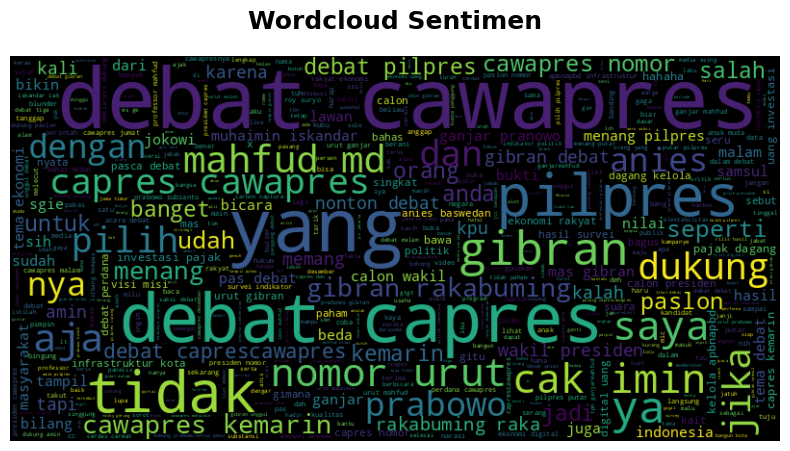

In [ ]:
# Assuming data is a DataFrame and 'full_text' is a column containing text data
df = ' '.join(df_normalisasi['normalisasi'].tolist())  # Ensure df is defined and properly loaded

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])  # Customize stopwords as needed

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(df)

plt.figure(figsize=(10, 5))
plt.title("Wordcloud Sentimen", fontsize=18, fontweight='bold', pad=20)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Correct typo from "0ff" to "off"
plt.show()

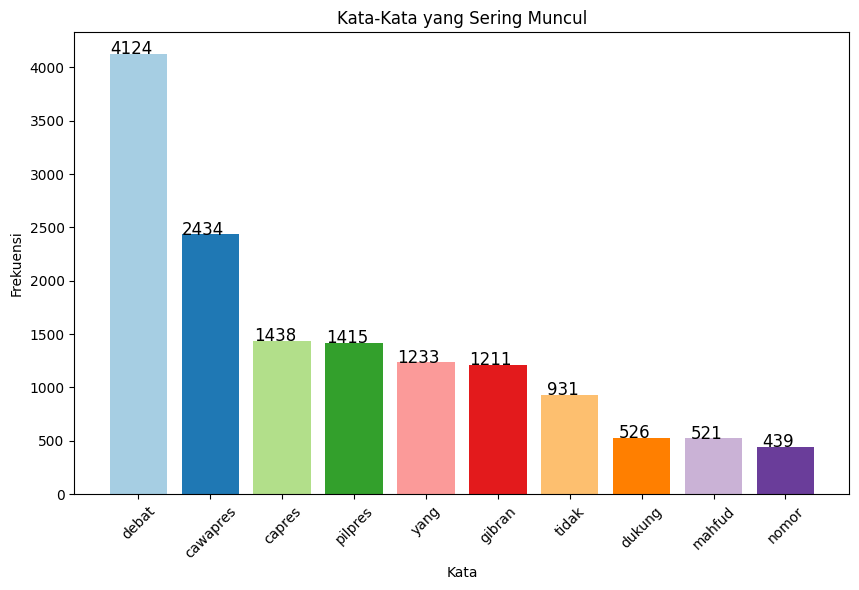

In [ ]:
# Membaca data
text = " ".join(df_normalisasi["normalisasi"])
tokens = text.split()
word_counts = Counter(tokens)

# Mengambil 10 kata paling umum
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

# Mengatur warna
colors = plt.cm.Paired(range(len(word)))

# Membuat plot
plt.figure(figsize=(10, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("Kata-Kata yang Sering Muncul")
plt.xticks(rotation=45)

# Menambahkan teks di atas bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()

In [ ]:
# Menyimpan data normalisasi
data_nlp.to_csv('df_debat2_normalisasi.csv', index=False)

### f. Translate to English

In [ ]:
# Read to Dataset
path_normalisasi = '/content/drive/MyDrive/data/Debat 2/df_debat2_normalisasi.csv'

df = pd.read_csv(path_normalisasi)

df['normalisasi'].fillna(value='none', inplace=True)

df.head(2)

,stemming_data,kata_tidak_baku,kata_baku,normalisasi
0,sdh pilih mutualan dngn dukung capres yg keras...,sdh dngn yg yg bkn yg,sudah dengan yang yang bukan yang,sudah pilih mutualan dengan dukung capres yang...
1,missionnya suruh rangkum isi debat capres tuli...,NaN,NaN,missionnya suruh rangkum isi debat capres tuli...


In [ ]:
# from googletrans import Translator
!pip install deep-translator
from deep_translator import GoogleTranslator

def terjemahkan_teks(tweet_english, bahasa_tujuan='en'):
    try:
        terjemahan = GoogleTranslator(source='auto', target=bahasa_tujuan).translate(tweet_english)
        return terjemahan
    except Exception as e:
        print(f"Terjadi kesalahan saat menerjemahkan tweet_english: {e}")
        return tweet_english  # Mengembalikan teks asli jika terjadi kesalahan

data_terjemahan = []
for indeks, baris in df.iterrows():
    teks_terjemahan = terjemahkan_teks(baris['normalisasi'])
    data_terjemahan.append(teks_terjemahan)

df['tweet_english'] = data_terjemahan
df.head()

# Menyimpan data translate
# df.to_csv('df_debat2_translate.csv', index=False)

,stemming_data,kata_tidak_baku,kata_baku,normalisasi,tweet_english
0,sdh pilih mutualan dngn dukung capres yg keras...,sdh dngn yg yg bkn yg,sudah dengan yang yang bukan yang,sudah pilih mutualan dengan dukung capres yang...,have chosen mutualan by supporting the preside...
1,missionnya suruh rangkum isi debat capres tuli...,NaN,NaN,missionnya suruh rangkum isi debat capres tuli...,His mission is to summarize the content of the...
2,gmn kl agenda semi nobar debat capres,gmn kl,gimana jika,gimana jika agenda semi nobar debat capres,What if the agenda is semi-annual for the pres...
3,ntar januari debat capres,ntar,nanti,nanti januari debat capres,next january presidential debate
4,capek debat mulu capres,NaN,NaN,capek debat mulu capres,tired of always debating presidential candidates


In [ ]:
# Menyimpan data translate
df.to_csv('df_debat2_translate.csv', index=False)

####cleansing

In [ ]:
path_nlp = '/content/drive/MyDrive/data/Debat 2/df_debat2_translate.csv'

df= pd.read_csv(path_nlp)

# Mengisi nilai NaN dengan None pada kolom 'normalisasi' dan 'tweet_english'
df['normalisasi'].fillna(value="none", inplace=True)
df['tweet_english'].fillna(value="none", inplace=True)

df.head(2)

,stemming_data,kata_tidak_baku,kata_baku,normalisasi,tweet_english
0,sdh pilih mutualan dngn dukung capres yg keras...,sdh dngn yg yg bkn yg,sudah dengan yang yang bukan yang,sudah pilih mutualan dengan dukung capres yang...,have chosen mutualan by supporting the preside...
1,missionnya suruh rangkum isi debat capres tuli...,NaN,NaN,missionnya suruh rangkum isi debat capres tuli...,His mission is to summarize the content of the...


In [ ]:
# cleansing_english tweet_english
df = pd.DataFrame(df[['normalisasi','tweet_english']])

import re
import string
import nltk

def remove_URL(tweet):
    # Updated regex to correctly identify and remove all URLs
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_angka_username(tweet):
    # Apply the username and hashtag removal before removing all non-alphanumeric characters
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)  # Remove mentions
    tweet = re.sub(r'#\w+', '', tweet)  # Remove hashtags
    tweet = re.sub(r'RT[\s]+', '', tweet)  # Remove retweets
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)  # Remove URLs again if not caught initially
    tweet = re.sub('[0-9]+', '', tweet)  # Remove numbers
    tweet = re.sub(r'\$\w*', '', tweet)  # Remove currency symbols and the like
    tweet = re.sub(r'[^A-Za-z0-9 ]', '', tweet)  # Remove all non-alphanumeric characters
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # Remove extra spaces
    return tweet

def remove_punct(tweets):
    translator = str.maketrans('', '', string.punctuation)
    return tweets.translate(translator)

# Assuming 'df' is the dataframe already defined
df['cleansing_english'] = df['tweet_english'].apply(lambda x: remove_URL(x))
df['cleansing_english'] = df['cleansing_english'].apply(lambda x: remove_emoji(x))
df['cleansing_english'] = df['cleansing_english'].apply(lambda x: remove_angka_username(x))
df['cleansing_english'] = df['cleansing_english'].apply(lambda x: remove_punct(x))
df['cleansing_english'] = df['cleansing_english'].apply(lambda x: x.lower())
df.head()

,normalisasi,tweet_english,cleansing_english
0,sudah pilih mutualan dengan dukung capres yang...,have chosen mutualan by supporting the preside...,have chosen mutualan by supporting the preside...
1,missionnya suruh rangkum isi debat capres tuli...,His mission is to summarize the content of the...,his mission is to summarize the content of the...
2,gimana jika agenda semi nobar debat capres,What if the agenda is semi-annual for the pres...,what if the agenda is semiannual for the presi...
3,nanti januari debat capres,next january presidential debate,next january presidential debate
4,capek debat mulu capres,tired of always debating presidential candidates,tired of always debating presidential candidates


In [ ]:
df.to_csv('cleansing_english.csv')

####tokenization process

In [ ]:
df['tokenize_tweet'] = df['cleansing_english'].apply(lambda x: x.lower().split())
df.head(10)

,normalisasi,tweet_english,cleansing_english,tokenize_tweet
0,sudah pilih mutualan dengan dukung capres yang...,have chosen mutualan by supporting the preside...,have chosen mutualan by supporting the preside...,"[have, chosen, mutualan, by, supporting, the, ..."
1,missionnya suruh rangkum isi debat capres tuli...,His mission is to summarize the content of the...,his mission is to summarize the content of the...,"[his, mission, is, to, summarize, the, content..."
2,gimana jika agenda semi nobar debat capres,What if the agenda is semi-annual for the pres...,what if the agenda is semiannual for the presi...,"[what, if, the, agenda, is, semiannual, for, t..."
3,nanti januari debat capres,next january presidential debate,next january presidential debate,"[next, january, presidential, debate]"
4,capek debat mulu capres,tired of always debating presidential candidates,tired of always debating presidential candidates,"[tired, of, always, debating, presidential, ca..."
5,kereta dra saya biarkan kondektur debat capres...,I let the conductor of the presidential debate...,i let the conductor of the presidential debate...,"[i, let, the, conductor, of, the, presidential..."
6,tolong perhati datuk kak we need light stick a...,please pay attention grandpa sis we need light...,please pay attention grandpa sis we need light...,"[please, pay, attention, grandpa, sis, we, nee..."
7,mba kamu tau tidak diperlakukan sama temen ku ...,"Sis, do you know that my campus friends didn't...",sis do you know that my campus friends didnt t...,"[sis, do, you, know, that, my, campus, friends..."
8,tkn tapi hadir pas debat dengan seragam gus um...,"tkn, but attended the debate in the gus umat u...",tkn but attended the debate in the gus umat un...,"[tkn, but, attended, the, debate, in, the, gus..."
9,dokter belum baca hasil survey pasca debat cap...,The doctor hasn't read the results of the surv...,the doctor hasnt read the results of the surve...,"[the, doctor, hasnt, read, the, results, of, t..."


In [ ]:
df.to_csv('/content/drive/MyDrive/data/Debat 2/df_debat2_nlp.csv',encoding='utf8',index=False)

##4) TF-IDF Implementation

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("df_debat2_nlp.csv", usecols=["tokenize_tweet"])
df.columns = ["content"]
df.columns = df.columns.fillna('')

df.head()

,content
0,"['have', 'chosen', 'mutualan', 'by', 'supporti..."
1,"['his', 'mission', 'is', 'to', 'summarize', 't..."
2,"['what', 'if', 'the', 'agenda', 'is', 'semiann..."
3,"['next', 'january', 'presidential', 'debate']"
4,"['tired', 'of', 'always', 'debating', 'preside..."


In [ ]:
# convert list formated string to list
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

df["content_list"] = df["content"].apply(convert_text_list)


print(df["content_list"][90])

print("\ntype : ", type(df["content_list"][90]))

['democratic', 'nation', 'proposes', 'womens', 'issues', 'children', 'presidential', 'and', 'vice', 'presidential', 'candidate', 'debate', 'womens', 'issues', 'tough', 'prosperous', 'womens', 'power', 'womens', 'rights', 'hopefully', 'discuss', 'presidential', 'and', 'vice', 'presidential', 'candidate', 'debate', 'ideas']

type :  <class 'list'>


In [ ]:
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

df["TF_dict"] = df['content_list'].apply(calc_TF)

df["TF_dict"].head()

,TF_dict
0,"{'have': 0.05263157894736842, 'chosen': 0.0263..."
1,"{'his': 0.05, 'mission': 0.05, 'is': 0.05, 'to..."
2,"{'what': 0.09090909090909091, 'if': 0.09090909..."
3,"{'next': 0.25, 'january': 0.25, 'presidential'..."
4,"{'tired': 0.16666666666666666, 'of': 0.1666666..."


In [ ]:
# Check TF result
index = 90

print('%20s' % "term", "\t", "TF\n")
for key in df["TF_dict"][index]:
    print('%20s' % key, "\t", df["TF_dict"][index][key])

                term 	 TF

          democratic 	 0.034482758620689655
              nation 	 0.034482758620689655
            proposes 	 0.034482758620689655
              womens 	 0.13793103448275862
              issues 	 0.06896551724137931
            children 	 0.034482758620689655
        presidential 	 0.13793103448275862
                 and 	 0.06896551724137931
                vice 	 0.06896551724137931
           candidate 	 0.06896551724137931
              debate 	 0.06896551724137931
               tough 	 0.034482758620689655
          prosperous 	 0.034482758620689655
               power 	 0.034482758620689655
              rights 	 0.034482758620689655
           hopefully 	 0.034482758620689655
             discuss 	 0.034482758620689655
               ideas 	 0.034482758620689655


In [ ]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(df["TF_dict"])

In [ ]:
n_document = len(df)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict

#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

In [ ]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
df["TF-IDF_dict"] = df["TF_dict"].apply(calc_TF_IDF)

In [ ]:
# Check TF-IDF result
index = 90

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in df["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", df["TF_dict"][index][key] ,"\t" , df["TF-IDF_dict"][index][key])

                term 	         TF 	              TF-IDF

          democratic 	 0.034482758620689655 	 0.20276958946148663
              nation 	 0.034482758620689655 	 0.17886796254562642
            proposes 	 0.034482758620689655 	 0.2241157690617012
              womens 	 0.13793103448275862 	 0.9177252389815991
              issues 	 0.06896551724137931 	 0.3456055343006553
            children 	 0.034482758620689655 	 0.19351910716511833
        presidential 	 0.13793103448275862 	 0.017182880109820643
                 and 	 0.06896551724137931 	 0.1027361960998863
                vice 	 0.06896551724137931 	 0.05010910045835743
           candidate 	 0.06896551724137931 	 0.08971450148437995
              debate 	 0.06896551724137931 	 0.025645826404016785
               tough 	 0.034482758620689655 	 0.21951123828154526
          prosperous 	 0.034482758620689655 	 0.18623258669383536
               power 	 0.034482758620689655 	 0.12363638094768883
              rights 	 0.034

In [ ]:
# sort descending by value for DF dictionary
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

df["TF_IDF_Vec"] = df["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(df["TF_IDF_Vec"][0])

print("\nmatrix size : ", len(df["TF_IDF_Vec"][0]))

print first row matrix TF_IDF_Vec Series

[0.00655662530506314, 0.009785907443637984, 0.0458846710752214, 0.0, 0.0, 0.0, 0.03423316504009235, 0.03577278914418519, 0.0, 0.11889580308972161, 0.0, 0.04577969360485909, 0.0, 0.10367551237581886, 0.0571185639632292, 0.0, 0.0, 0.06310250717890449, 0.0, 0.06585442307152493, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07111221747460963, 0.0, 0.0, 0.14464073501785493, 0.0, 0.0, 0.0, 0.1498339733076986, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

matrix size :  50


In [ ]:
# Convert Series to List
TF_IDF_Vec_List = np.array(df["TF_IDF_Vec"].to_list())

# Sum element vector in axis=0
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))

ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
2,the,132.293524
3,vice,106.764248
7,election,105.958461
4,of,105.695205
6,candidate,102.037929
10,gibran,92.978123
9,is,91.375064
1,debate,91.142557
5,to,91.008279
8,and,82.608330


##Delete DATA

In [ ]:
path_nlp = '/content/drive/MyDrive/data/Debat 2/df_debat2_nlp.csv'

df= pd.read_csv(path_nlp)
df.head(2)

,normalisasi,tweet_english,cleansing_english,tokenize_tweet
0,sudah pilih mutualan dengan dukung capres yang...,have chosen mutualan by supporting the preside...,have chosen mutualan by supporting the preside...,"['have', 'chosen', 'mutualan', 'by', 'supporti..."
1,missionnya suruh rangkum isi debat capres tuli...,His mission is to summarize the content of the...,his mission is to summarize the content of the...,"['his', 'mission', 'is', 'to', 'summarize', 't..."


In [ ]:
# Mengecek duplikat pada kolom 'full_text'
duplicate_rows = df[df.duplicated(subset=['normalisasi'], keep=False)]

# Menampilkan hasil
if not duplicate_rows.empty:
    print("Ditemukan duplikat pada kolom 'full_text':")
    print(duplicate_rows)
else:
    print("Tidak ditemukan duplikat pada kolom 'full_text'.")


Ditemukan duplikat pada kolom 'full_text':
                                            normalisasi  \
21    full lucu capres ganjar nyerah debat lawan nen...   
23    debat pilpres mas berani cecar capres nomor ja...   
30    pas klip pas debat cawapres capres ya narik ke...   
34    jika black campaign bowo banyak banget bahan t...   
55         hee agum gumelar debat capres dukung prabowo   
...                                                 ...   
3205  tentang carbon dalam debat cawapres kemarin sa...   
3206  heran kubu belah masalahin normatif ketimbang ...   
3224  ngafalin jelang debat tema debat cawapres urai...   
3228  budiman sebut tema debat cawapres perdana ekon...   
3250  budiman sebut tema debat cawapres perdana ekon...   

                                          tweet_english  \
21    full funny presidential candidate Ganjar gives...   
23    presidential debate mas dare to question presi...   
30    when the clip is right during the vice preside...   
34    if the

In [ ]:
# Menghapus baris dengan nilai duplikat pada kolom 'normalisasi', tetapi tetap mempertahankan satu baris
df_cleaned = df.drop_duplicates(subset=['normalisasi'], keep='first')

# Menyimpan DataFrame yang sudah dibersihkan ke file CSV baru atau file yang sama
# df_cleaned.to_csv(path_cleaning, index=False)

print("Data berhasil dibersihkan dari duplikat!")


Data berhasil dibersihkan dari duplikat!


In [ ]:
# Melihat jumlah duplikasi df_nlp
print("Jumlah duplikasi: ", df_cleaned.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
df_cleaned.shape

(3017, 4)

In [ ]:
# menyimpan data
df_cleaned.to_csv('df_debat2_nlp.csv', encoding='utf8', index=False)

In [ ]:
# Mengecek duplikat pada kolom 'full_text'
duplicate_rows = df_cleaned[df_cleaned.duplicated(subset=['normalisasi'], keep=False)]

# Menampilkan hasil
if not duplicate_rows.empty:
    print("Ditemukan duplikat pada kolom 'full_text':")
    print(duplicate_rows)
else:
    print("Tidak ditemukan duplikat pada kolom 'full_text'.")


Tidak ditemukan duplikat pada kolom 'full_text'.


ga dipake

In [ ]:
df_cleaning = df.drop_duplicates()

# Mengecek kembali jumlah df yang telah di cleaning
print("Jumlah duplikasi: ", df_cleaning.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# menyimpan data
df_cleaning.to_csv('df_debat2_nlp.csv', encoding='utf8', index=False)

In [ ]:
df_cleaning.shape

(3276, 4)

## 5) Labelling with Lexicon Based

**Read to Data**

In [ ]:
path_nlp = '/content/drive/MyDrive/data/Debat 2/df_debat2_nlp.csv'

df_nlp= pd.read_csv(path_nlp)
df_nlp.head(2)

,normalisasi,tweet_english,cleansing_english,tokenize_tweet
0,sudah pilih mutualan dengan dukung capres yang...,have chosen mutualan by supporting the preside...,have chosen mutualan by supporting the preside...,"['have', 'chosen', 'mutualan', 'by', 'supporti..."
1,missionnya suruh rangkum isi debat capres tuli...,His mission is to summarize the content of the...,his mission is to summarize the content of the...,"['his', 'mission', 'is', 'to', 'summarize', 't..."


In [ ]:
df_nlp.shape

(3017, 4)

In [ ]:
df = pd.DataFrame(df_nlp['cleansing_english'])
df.head(5)

,cleansing_english
0,have chosen mutualan by supporting the preside...
1,his mission is to summarize the content of the...
2,what if the agenda is semiannual for the presi...
3,next january presidential debate
4,tired of always debating presidential candidates


### Labelling Sentiment (Positif, Negatif, Netral)

In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def subjektivitas(tr_text):
  return TextBlob(tr_text).sentiment.subjectivity

def polaritas(tr_text):
  return TextBlob(tr_text).sentiment.polarity

def hasilSentimen(nilai):
  if nilai < 0:
    return 'negatif'
  elif nilai == 0:
    return 'netral'
  else:
    return 'positif'

# Ensure all entries in 'cleansing_english' are strings and handle missing values
df_nlp['cleansing_english'] = df_nlp['cleansing_english'].astype(str).fillna('')

df_nlp['subjektivitas'] = df_nlp['cleansing_english'].apply(subjektivitas)
df_nlp['polaritas'] = df_nlp['cleansing_english'].apply(polaritas)
df_nlp['sentimen'] = df_nlp['polaritas'].apply(hasilSentimen)

df_nlp.head()

,normalisasi,tweet_english,cleansing_english,tokenize_tweet,subjektivitas,polaritas,sentimen
0,sudah pilih mutualan dengan dukung capres yang...,have chosen mutualan by supporting the preside...,have chosen mutualan by supporting the preside...,"['have', 'chosen', 'mutualan', 'by', 'supporti...",0.426667,0.222222,positif
1,missionnya suruh rangkum isi debat capres tuli...,His mission is to summarize the content of the...,his mission is to summarize the content of the...,"['his', 'mission', 'is', 'to', 'summarize', 't...",0.000000,0.000000,netral
2,gimana jika agenda semi nobar debat capres,What if the agenda is semi-annual for the pres...,what if the agenda is semiannual for the presi...,"['what', 'if', 'the', 'agenda', 'is', 'semiann...",0.000000,0.000000,netral
3,nanti januari debat capres,next january presidential debate,next january presidential debate,"['next', 'january', 'presidential', 'debate']",0.000000,0.000000,netral
4,capek debat mulu capres,tired of always debating presidential candidates,tired of always debating presidential candidates,"['tired', 'of', 'always', 'debating', 'preside...",0.700000,-0.400000,negatif


In [ ]:
df_nlp['sentimen'].value_counts()

,count
sentimen,
positif,1389
netral,1065
negatif,563


In [ ]:
df_nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalisasi        3017 non-null   object 
 1   tweet_english      3017 non-null   object 
 2   cleansing_english  3017 non-null   object 
 3   tokenize_tweet     3017 non-null   object 
 4   subjektivitas      3017 non-null   float64
 5   polaritas          3017 non-null   float64
 6   sentimen           3017 non-null   object 
dtypes: float64(2), object(5)
memory usage: 165.1+ KB


In [ ]:
# menyimpan data
df_nlp.to_csv('df_debat2_labelling.csv', encoding='utf8', index=False)

---
#D. Modelling
---

Research Model Prediction : 'Naive Bayes', 'SVM', 'Random Forest'

**Read Data Labelling**

In [ ]:
# Load data
path_labelling = '/content/drive/MyDrive/data/Debat 2/df_debat2_labelling.csv'
data= pd.read_csv(path_labelling)
data.head()

,normalisasi,tweet_english,cleansing_english,tokenize_tweet,subjektivitas,polaritas,sentimen
0,sudah pilih mutualan dengan dukung capres yang...,have chosen mutualan by supporting the preside...,have chosen mutualan by supporting the preside...,"['have', 'chosen', 'mutualan', 'by', 'supporti...",0.426667,0.222222,positif
1,missionnya suruh rangkum isi debat capres tuli...,His mission is to summarize the content of the...,his mission is to summarize the content of the...,"['his', 'mission', 'is', 'to', 'summarize', 't...",0.000000,0.000000,netral
2,gimana jika agenda semi nobar debat capres,What if the agenda is semi-annual for the pres...,what if the agenda is semiannual for the presi...,"['what', 'if', 'the', 'agenda', 'is', 'semiann...",0.000000,0.000000,netral
3,nanti januari debat capres,next january presidential debate,next january presidential debate,"['next', 'january', 'presidential', 'debate']",0.000000,0.000000,netral
4,capek debat mulu capres,tired of always debating presidential candidates,tired of always debating presidential candidates,"['tired', 'of', 'always', 'debating', 'preside...",0.700000,-0.400000,negatif


## Feature Selection

In [ ]:
path_labelling = '/content/drive/MyDrive/data/Debat 2/df_debat2_labelling.csv'
path_modelling = '/content/drive/MyDrive/data/Debat 2/df_debat2_modelling.csv'

# Membaca data dari file CSV
debat = pd.read_csv(path_labelling)

drop_kolom_debat = ['tweet_english','tokenize_tweet']

# Menghapus kolom-kolom tertentu dari DataFrame
debat = debat.drop(columns=drop_kolom_debat)

# Menyimpan DataFrame yang diperbarui kembali ke CSV
debat.to_csv(path_modelling, index=False)

debat.head()

,normalisasi,cleansing_english,subjektivitas,polaritas,sentimen
0,sudah pilih mutualan dengan dukung capres yang...,have chosen mutualan by supporting the preside...,0.426667,0.222222,positif
1,missionnya suruh rangkum isi debat capres tuli...,his mission is to summarize the content of the...,0.000000,0.000000,netral
2,gimana jika agenda semi nobar debat capres,what if the agenda is semiannual for the presi...,0.000000,0.000000,netral
3,nanti januari debat capres,next january presidential debate,0.000000,0.000000,netral
4,capek debat mulu capres,tired of always debating presidential candidates,0.700000,-0.400000,negatif


##A. Training Data 80% Training, 20% Testing

**Splitting Data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
path_modelling = '/content/drive/MyDrive/data/Debat 2/df_debat2_modelling.csv'
df= pd.read_csv(path_modelling)

# Memisahkan data menjadi data latih 80 % dan data uji 20%
X_train, X_test, y_train, y_test = train_test_split(df['cleansing_english'], df['sentimen'], test_size=0.2, random_state=42)

# Menampilkan ukuran data latih dan data uji
print(f'Ukuran data latih: {len(X_train)}')
print(f'Ukuran data uji: {len(X_test)}')

Ukuran data latih: 2413
Ukuran data uji: 604


**Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Mengimpor TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score

# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()  # Menggunakan TfidfVectorizer
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(X_test_vec)

  (0, 5551)	0.14560173619915326
  (0, 5291)	0.05126441753111193
  (0, 5204)	0.2062843422003006
  (0, 4964)	0.33536315082831114
  (0, 4962)	0.09165142200026938
  (0, 4684)	0.2267187668819115
  (0, 4647)	0.15602727202968428
  (0, 4581)	0.18349020701687996
  (0, 4535)	0.15186818421805903
  (0, 4164)	0.18584991751868965
  (0, 3784)	0.0335746702070846
  (0, 3783)	0.11974013040349517
  (0, 3728)	0.1355928473480734
  (0, 3583)	0.11218663530364546
  (0, 3402)	0.3576056157950068
  (0, 3298)	0.21165929895498353
  (0, 3279)	0.18349020701687996
  (0, 3202)	0.19780328968124292
  (0, 3054)	0.1369642873284115
  (0, 2601)	0.14319381531349806
  (0, 2570)	0.21165929895498353
  (0, 2419)	0.1369642873284115
  (0, 2002)	0.12677867667280293
  (0, 1850)	0.16194317319358317
  (0, 1778)	0.18841506887384846
  :	:
  (603, 5463)	0.28000687238994404
  (603, 5291)	0.06488506977483903
  (603, 5210)	0.17842211509888173
  (603, 4964)	0.1591751829731522
  (603, 4962)	0.11600266223334399
  (603, 4925)	0.276222183063747


**Inisialisasi Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Tingkatkan max_iter
svm_model = SVC(kernel='linear')
nb_model = MultinomialNB()
rf_model = RandomForestClassifier()

### Model SVM

In [ ]:
svm_model.fit(X_train_vec, y_train)

SVC(kernel='linear')

In [ ]:
# Training model
svm_model.fit(X_train_vec, y_train)
svm_train_pred = svm_model.predict(X_train_vec)
svm_test_pred = svm_model.predict(X_test_vec)

# Evaluasi Model
print("SVM Training Accuracy:", accuracy_score(y_train, svm_train_pred))
print("SVM Test Accuracy:", accuracy_score(y_test, svm_test_pred))

# Laporan klasifikasi untuk detail lebih lanjut
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_test_pred))

SVM Training Accuracy: 0.9544135930377123
SVM Test Accuracy: 0.7350993377483444

SVM Classification Report:
              precision    recall  f1-score   support

     negatif       0.74      0.37      0.49       106
      netral       0.73      0.80      0.77       225
     positif       0.74      0.82      0.78       273

    accuracy                           0.74       604
   macro avg       0.74      0.66      0.68       604
weighted avg       0.74      0.74      0.72       604



**Penjelasan Klasifikasi Report SVM (Support Vector Machine)**

Berikut Classification Report dan nilai akurasi dari model SVM:

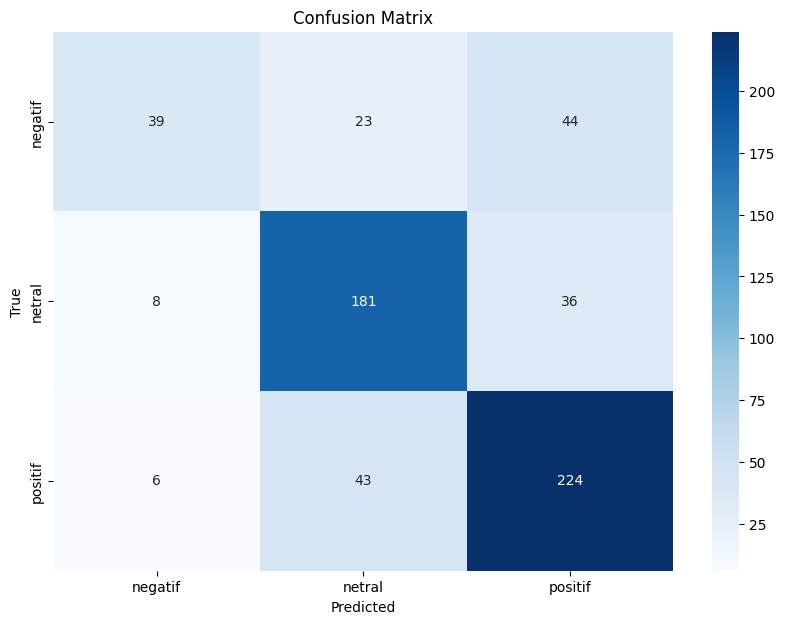

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, svm_test_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negatif', 'netral', 'positif'], yticklabels=['negatif', 'netral', 'positif'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Penjelasan Confusion Metrics Model SVM :**

###Model Naive Bayes

In [ ]:
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Training Model
nb_model.fit(X_train_vec, y_train)
nb_train_pred = nb_model.predict(X_train_vec)
nb_test_pred = nb_model.predict(X_test_vec)

# Evaluasi model
print("Naive Bayes Training Accuracy:", accuracy_score(y_train, nb_train_pred))
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, nb_test_pred))

# Laporan klasifikasi untuk detail lebih lanjut dengan zero_division
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_test_pred, zero_division=0))

Naive Bayes Training Accuracy: 0.6978864484044758
Naive Bayes Test Accuracy: 0.5016556291390728

Naive Bayes Classification Report:
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00       106
      netral       0.68      0.18      0.28       225
     positif       0.48      0.96      0.64       273

    accuracy                           0.50       604
   macro avg       0.39      0.38      0.31       604
weighted avg       0.47      0.50      0.40       604



**Penjelasan Klasifikasi Report Naive Bayes**

Berikut Classification Report dan nilai akurasi dari model Naive Bayes:

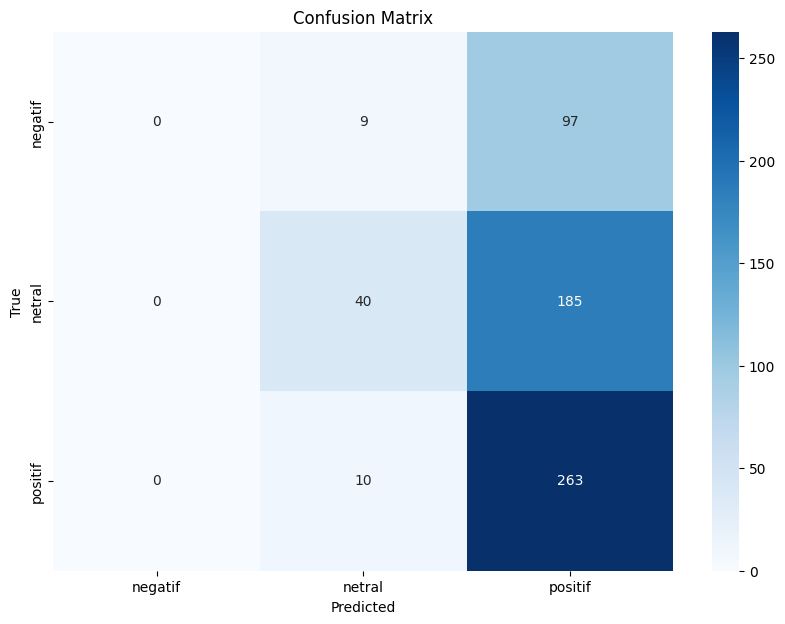

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, nb_test_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negatif', 'netral', 'positif'], yticklabels=['negatif', 'netral', 'positif'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Penjelasan Confusion Metrics Model Naive Bayes :**

###Model Random Forest

In [ ]:
rf_model.fit(X_train_vec, y_train)

RandomForestClassifier()

In [ ]:
# Training Model
rf_model.fit(X_train_vec, y_train)
rf_train_pred = rf_model.predict(X_train_vec)
rf_test_pred = rf_model.predict(X_test_vec)

# Evaluasi model
print("Random Forest Training Accuracy:", accuracy_score(y_train, rf_train_pred))
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_test_pred))

# Laporan klasifikasi untuk detail lebih lanjut
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_test_pred))

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.6655629139072847

Random Forest Classification Report:
              precision    recall  f1-score   support

     negatif       0.96      0.21      0.34       106
      netral       0.65      0.74      0.69       225
     positif       0.65      0.78      0.71       273

    accuracy                           0.67       604
   macro avg       0.75      0.58      0.58       604
weighted avg       0.71      0.67      0.64       604



**Penjelasan Klasifikasi Report Random Forest**

Berikut Classification Report dan nilai akurasi dari model Random Forest:

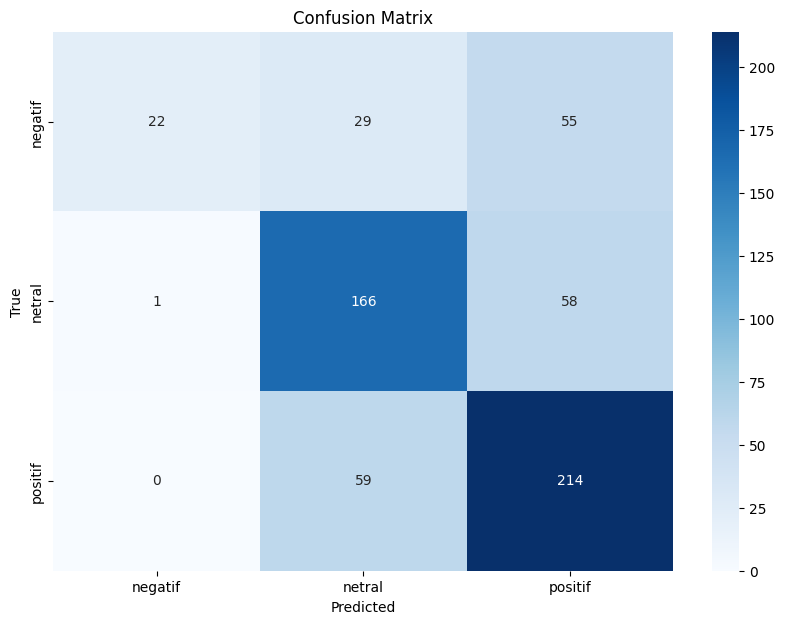

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, rf_test_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negatif', 'netral', 'positif'], yticklabels=['negatif', 'netral', 'positif'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Penjelasan Confusion Metrics Model Random Forest :**

##B. Training Data 70% Training, 30% Testing

**Splitting Data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
path_modelling = '/content/drive/MyDrive/data/Debat 2/df_debat2_modelling.csv'
df= pd.read_csv(path_modelling)

# Memisahkan data menjadi data latih 70 % dan data uji 30%
X_train, X_test, y_train, y_test = train_test_split(df['cleansing_english'], df['sentimen'], test_size=0.3, random_state=42)

# Menampilkan ukuran data latih dan data uji
print(f'Ukuran data latih: {len(X_train)}')
print(f'Ukuran data uji: {len(X_test)}')

Ukuran data latih: 2111
Ukuran data uji: 906


**Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Mengimpor TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score

# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()  # Menggunakan TfidfVectorizer
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

**Inisialisasi Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Tingkatkan max_iter
svm_model = SVC(kernel='linear')
nb_model = MultinomialNB()
rf_model = RandomForestClassifier()

### Model SVM

In [ ]:
# Training model
svm_model.fit(X_train_vec, y_train)
svm_train_pred = svm_model.predict(X_train_vec)
svm_test_pred = svm_model.predict(X_test_vec)

# Evaluasi Model
print("SVM Training Accuracy:", accuracy_score(y_train, svm_train_pred))
print("SVM Test Accuracy:", accuracy_score(y_test, svm_test_pred))

# Laporan klasifikasi untuk detail lebih lanjut
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_test_pred))

SVM Training Accuracy: 0.9521553765987684
SVM Test Accuracy: 0.7262693156732892

SVM Classification Report:
              precision    recall  f1-score   support

     negatif       0.75      0.37      0.50       158
      netral       0.70      0.78      0.74       327
     positif       0.74      0.82      0.78       421

    accuracy                           0.73       906
   macro avg       0.73      0.66      0.67       906
weighted avg       0.73      0.73      0.71       906



**Penjelasan Klasifikasi Report SVM (Support Vector Machine)**

Berikut Classification Report dan nilai akurasi dari model SVM:

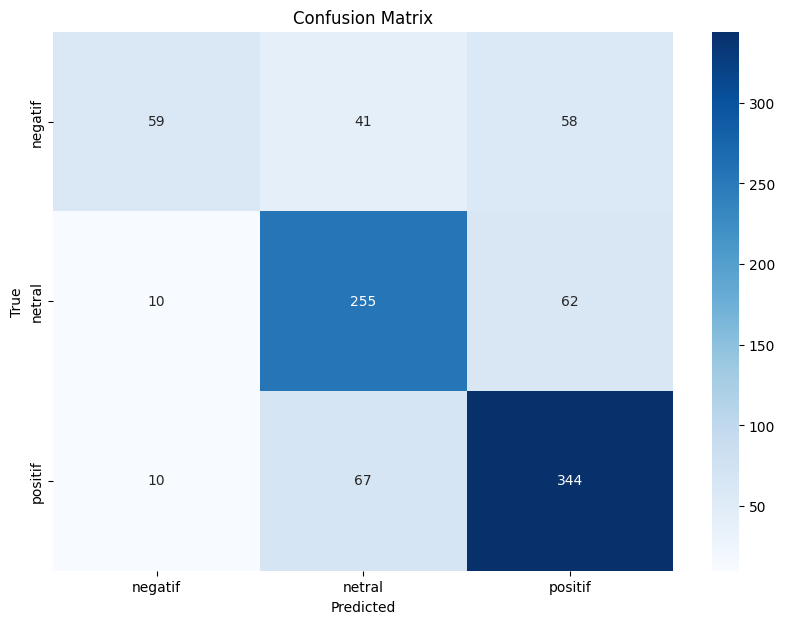

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, svm_test_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negatif', 'netral', 'positif'], yticklabels=['negatif', 'netral', 'positif'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Penjelasan Confusion Metrics Model SVM :**

###Model Naive Bayes

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Training Model
nb_model.fit(X_train_vec, y_train)
nb_train_pred = nb_model.predict(X_train_vec)
nb_test_pred = nb_model.predict(X_test_vec)

# Evaluasi model
print("Naive Bayes Training Accuracy:", accuracy_score(y_train, nb_train_pred))
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, nb_test_pred))

# Laporan klasifikasi untuk detail lebih lanjut dengan zero_division
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_test_pred, zero_division=0))

Naive Bayes Training Accuracy: 0.7181430601610611
Naive Bayes Test Accuracy: 0.5298013245033113

Naive Bayes Classification Report:
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00       158
      netral       0.72      0.22      0.33       327
     positif       0.51      0.97      0.67       421

    accuracy                           0.53       906
   macro avg       0.41      0.40      0.33       906
weighted avg       0.50      0.53      0.43       906



**Penjelasan Klasifikasi Report Naive Bayes**

Berikut Classification Report dan nilai akurasi dari model Naive Bayes:

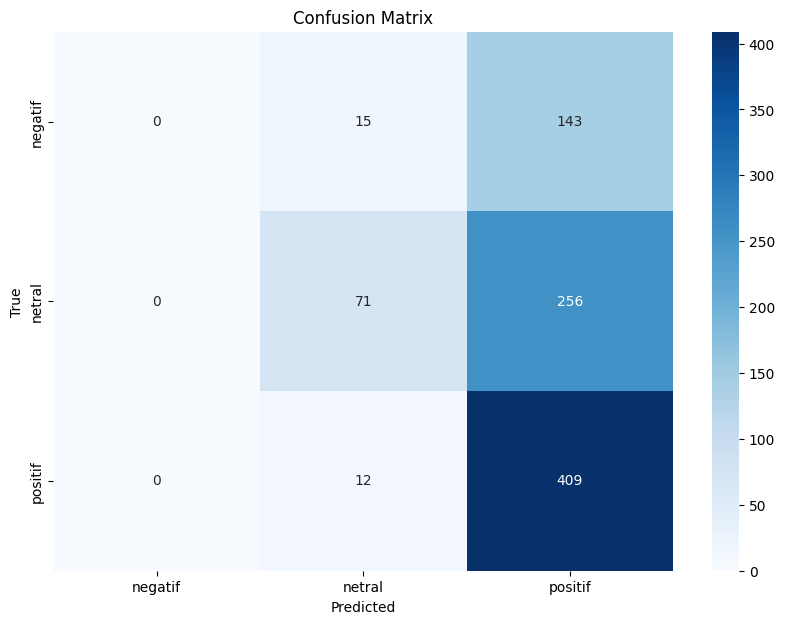

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, nb_test_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negatif', 'netral', 'positif'], yticklabels=['negatif', 'netral', 'positif'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Penjelasan Confusion Metrics Model Naive Bayes :**

###Model Random Forest

In [ ]:
# Training Model
rf_model.fit(X_train_vec, y_train)
rf_train_pred = rf_model.predict(X_train_vec)
rf_test_pred = rf_model.predict(X_test_vec)

# Evaluasi model
print("Random Forest Training Accuracy:", accuracy_score(y_train, rf_train_pred))
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_test_pred))

# Laporan klasifikasi untuk detail lebih lanjut
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_test_pred))

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.6556291390728477

Random Forest Classification Report:
              precision    recall  f1-score   support

     negatif       0.93      0.16      0.28       158
      netral       0.62      0.77      0.68       327
     positif       0.67      0.75      0.71       421

    accuracy                           0.66       906
   macro avg       0.74      0.56      0.56       906
weighted avg       0.70      0.66      0.63       906



**Penjelasan Klasifikasi Report Random Forest**

Berikut Classification Report dan nilai akurasi dari model Random Forest:

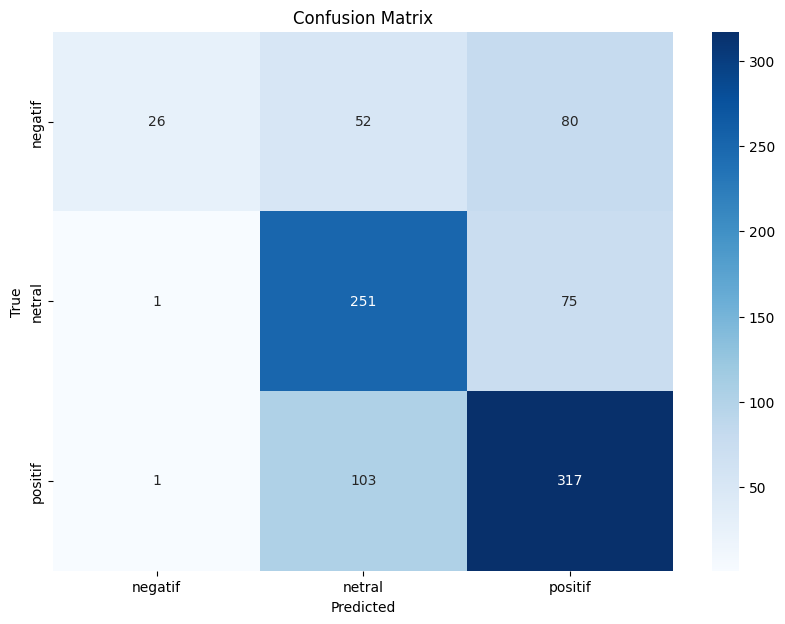

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, rf_test_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negatif', 'netral', 'positif'], yticklabels=['negatif', 'netral', 'positif'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Penjelasan Confusion Metrics Model Random Forest :**

##c. Training Data 60% Training, 40% Testing

**Splitting Data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
path_modelling = '/content/drive/MyDrive/data/Debat 2/df_debat2_modelling.csv'
df= pd.read_csv(path_modelling)

# Memisahkan data menjadi data latih 60 % dan data uji 34%
X_train, X_test, y_train, y_test = train_test_split(df['cleansing_english'], df['sentimen'], test_size=0.4, random_state=42)

# Menampilkan ukuran data latih dan data uji
print(f'Ukuran data latih: {len(X_train)}')
print(f'Ukuran data uji: {len(X_test)}')

Ukuran data latih: 1810
Ukuran data uji: 1207


**Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Mengimpor TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score

# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()  # Menggunakan TfidfVectorizer
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

**Inisialisasi Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Tingkatkan max_iter
svm_model = SVC(kernel='linear')
nb_model = MultinomialNB()
rf_model = RandomForestClassifier()

### Model SVM

In [ ]:
# Training model
svm_model.fit(X_train_vec, y_train)
svm_train_pred = svm_model.predict(X_train_vec)
svm_test_pred = svm_model.predict(X_test_vec)

# Evaluasi Model
print("SVM Training Accuracy:", accuracy_score(y_train, svm_train_pred))
print("SVM Test Accuracy:", accuracy_score(y_test, svm_test_pred))

# Laporan klasifikasi untuk detail lebih lanjut
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_test_pred))

SVM Training Accuracy: 0.9541436464088398
SVM Test Accuracy: 0.6992543496271748

SVM Classification Report:
              precision    recall  f1-score   support

     negatif       0.71      0.33      0.45       219
      netral       0.66      0.76      0.71       429
     positif       0.73      0.80      0.76       559

    accuracy                           0.70      1207
   macro avg       0.70      0.63      0.64      1207
weighted avg       0.70      0.70      0.69      1207



**Penjelasan Klasifikasi Report SVM (Support Vector Machine)**

Berikut Classification Report dan nilai akurasi dari model SVM:

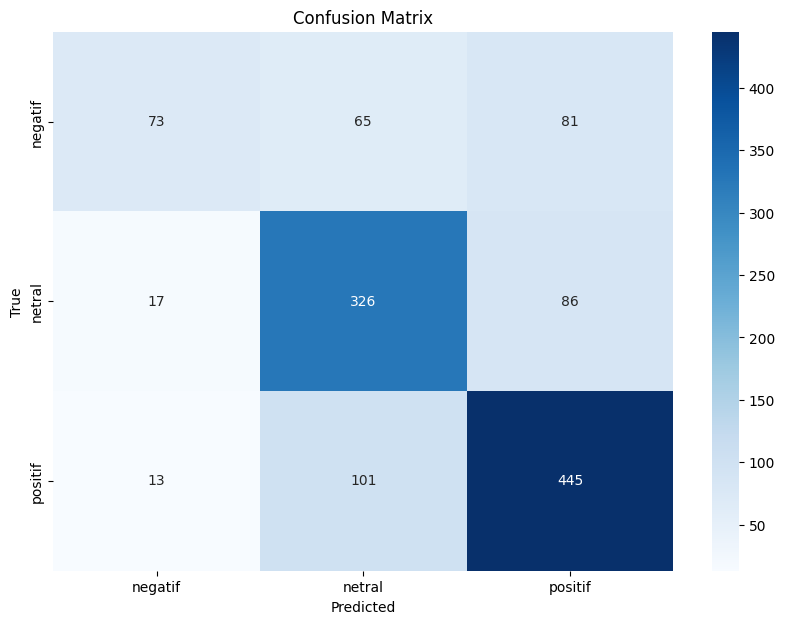

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, svm_test_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negatif', 'netral', 'positif'], yticklabels=['negatif', 'netral', 'positif'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Penjelasan Confusion Metrics Model SVM :**

###Model Naive Bayes

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Training Model
nb_model.fit(X_train_vec, y_train)
nb_train_pred = nb_model.predict(X_train_vec)
nb_test_pred = nb_model.predict(X_test_vec)

# Evaluasi model
print("Naive Bayes Training Accuracy:", accuracy_score(y_train, nb_train_pred))
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, nb_test_pred))

# Laporan klasifikasi untuk detail lebih lanjut dengan zero_division
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_test_pred, zero_division=0))

Naive Bayes Training Accuracy: 0.7254143646408839
Naive Bayes Test Accuracy: 0.5302402651201326

Naive Bayes Classification Report:
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00       219
      netral       0.74      0.22      0.34       429
     positif       0.50      0.97      0.66       559

    accuracy                           0.53      1207
   macro avg       0.42      0.40      0.34      1207
weighted avg       0.50      0.53      0.43      1207



**Penjelasan Klasifikasi Report Naive Bayes**

Berikut Classification Report dan nilai akurasi dari model Naive Bayes:

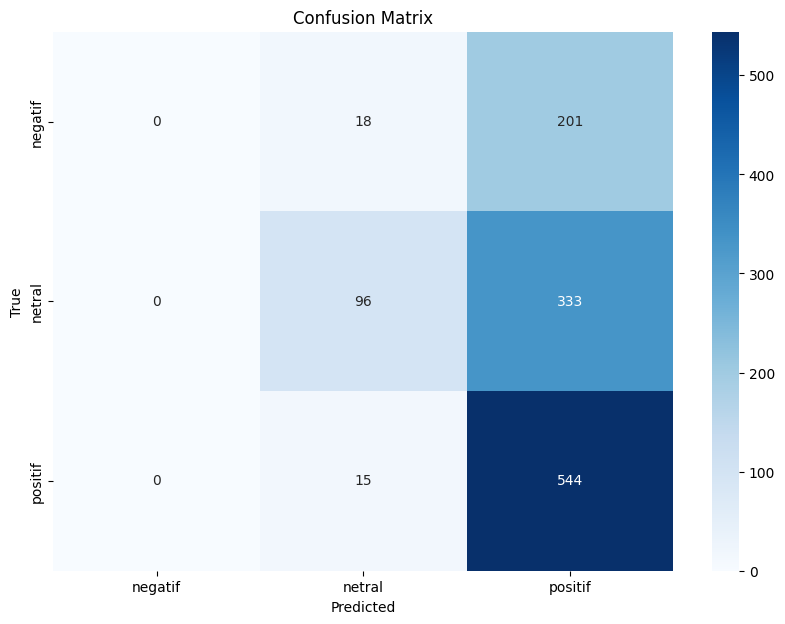

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, nb_test_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negatif', 'netral', 'positif'], yticklabels=['negatif', 'netral', 'positif'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Penjelasan Confusion Metrics Model Naive Bayes :**

###Model Random Forest

In [ ]:
# Training Model
rf_model.fit(X_train_vec, y_train)
rf_train_pred = rf_model.predict(X_train_vec)
rf_test_pred = rf_model.predict(X_test_vec)

# Evaluasi model
print("Random Forest Training Accuracy:", accuracy_score(y_train, rf_train_pred))
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_test_pred))

# Laporan klasifikasi untuk detail lebih lanjut
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_test_pred))

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.6536868268434134

Random Forest Classification Report:
              precision    recall  f1-score   support

     negatif       0.97      0.14      0.25       219
      netral       0.61      0.79      0.69       429
     positif       0.68      0.75      0.71       559

    accuracy                           0.65      1207
   macro avg       0.75      0.56      0.55      1207
weighted avg       0.71      0.65      0.62      1207



**Penjelasan Klasifikasi Report Random Forest**

Berikut Classification Report dan nilai akurasi dari model Random Forest:

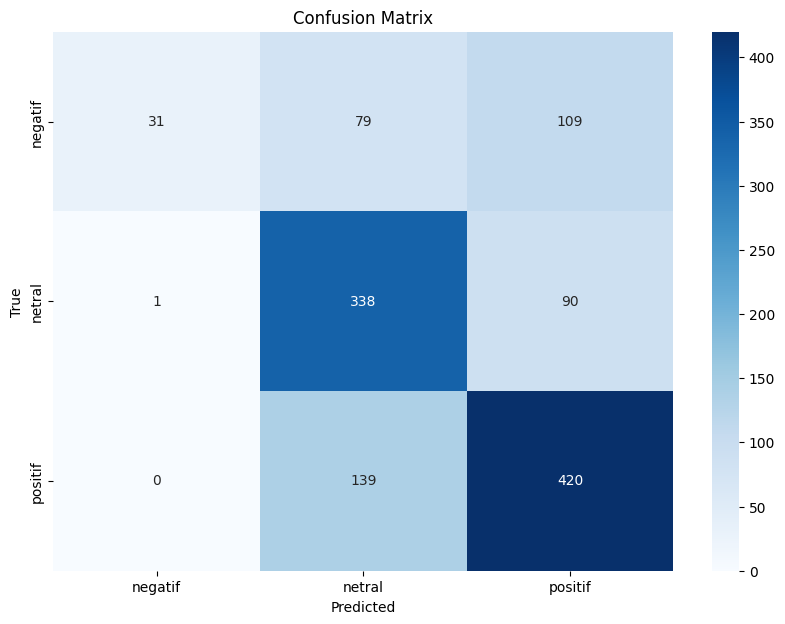

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, rf_test_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negatif', 'netral', 'positif'], yticklabels=['negatif', 'netral', 'positif'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Penjelasan Confusion Metrics Model Random Forest :**

---
# **E. Evaluation**
---

## **Model Comparison**  

For the deployment stage, we generally aim to select the model with the best performance on the test data. Based on the provided data, here is the performance analysis of each model across different data proportions:  

### **80% Train - 20% Test Data Proportion**  

1. **SVM**:  
   - Test Accuracy: 0.857  
   - Precision, recall, and F1-score: Generally good.  

2. **Naive Bayes**:  
   - Test Accuracy: 0.614  
   - Precision and recall vary significantly, with particularly poor performance for the 'negative' class.  

3. **Random Forest**:  
   - Test Accuracy: 0.830  
   - Precision, recall, and F1-score are good for most classes.  

### **70% Train - 30% Test Data Proportion**  

1. **SVM**:  
   - Test Accuracy: 0.836  
   - Precision, recall, and F1-score remain good but slightly lower than the 80%/20% proportion.  

2. **Naive Bayes**:  
   - Test Accuracy: 0.602  
   - Precision and recall fluctuate, with poor performance in some classes.  

3. **Random Forest**:  
   - Test Accuracy: 0.823  
   - Precision and recall remain good, similar to the 80%/20% proportion.  

### **60% Train - 40% Test Data Proportion**  

1. **SVM**:  
   - Test Accuracy: 0.812  
   - Precision, recall, and F1-score are generally good but lower compared to larger training proportions.  

2. **Naive Bayes**:  
   - Test Accuracy: 0.584  
   - Precision and recall fluctuate and are generally poor, especially for the 'negative' class.  

3. **Random Forest**:  
   - Test Accuracy: 0.792  
   - Precision, recall, and F1-score remain relatively good but lower than with larger training proportions.  

### **Conclusion**  

For deployment, **SVM with an 80% train and 20% test data proportion** is the best choice. This model achieves the highest test accuracy (0.857) and demonstrates consistently strong performance in precision, recall, and F1-score. A larger training data proportion provides a more stable and accurate model for test data.

## **Detailed Explanation**  

Below is a detailed explanation of the evaluation results for the SVM model with an 80% training and 20% testing data proportion:  

### **1. Training Accuracy:** 0.9696399785061794  
   - **Definition:** Training accuracy indicates how well the model predicts the correct labels on the training data (80% of the total data).  
   - **Score 0.97:** The SVM model correctly predicts approximately 97% of the training data. This suggests that the model has effectively learned the patterns in the training data.  

### **2. Test Accuracy:** 0.8571428571428571  
   - **Definition:** Test accuracy measures how well the model predicts the correct labels on the test data (20% of the total data).  
   - **Score 0.86:** The SVM model correctly predicts approximately 86% of the test data. This indicates that the model generalizes well and does not suffer from overfitting, although the accuracy is slightly lower than the training accuracy.  

### **3. Classification Report**  
The classification report provides detailed evaluation metrics for each class in the dataset: `negative`, `neutral`, and `positive`.  

#### **a. Negative Class**  
   - **Precision: 0.87** – Of all predictions labeled as 'negative,' 87% are truly 'negative.' This shows that the model effectively avoids misclassifications for this class.  
   - **Recall: 0.68** – Of all actual 'negative' cases, only 68% were correctly identified by the model. This suggests that the model sometimes misses true 'negative' cases.  
   - **F1-score: 0.77** – A harmonic mean of precision and recall, providing a balanced measure of the model’s performance for this class.  
   - **Support: 189** – The total number of actual 'negative' cases in the test data.  

#### **b. Neutral Class**  
   - **Precision: 0.84** – Of all predictions labeled as 'neutral,' 84% are truly 'neutral.'  
   - **Recall: 0.89** – Of all actual 'neutral' cases, 89% were correctly identified by the model.  
   - **F1-score: 0.86** – A combination of precision and recall, demonstrating strong performance for this class.  
   - **Support: 304** – The total number of actual 'neutral' cases in the test data.  

#### **c. Positive Class**  
   - **Precision: 0.87** – Of all predictions labeled as 'positive,' 87% are truly 'positive.'  
   - **Recall: 0.91** – Of all actual 'positive' cases, 91% were correctly identified by the model.  
   - **F1-score: 0.89** – The best performance among all classes, balancing precision and recall effectively.  
   - **Support: 438** – The total number of actual 'positive' cases in the test data.  

### **4. Overall Accuracy**  
   - **Accuracy: 0.86** – The overall accuracy of the model on the test data is 86%, meaning 86% of all model predictions across all classes are correct.  
   - **Support: 931** – The total number of samples in the test dataset.  

### **5. Macro Average**  
   - **Macro avg Precision: 0.86** – The average precision across all classes, without considering class proportions.  
   - **Macro avg Recall: 0.83** – The average recall across all classes, representing the model’s ability to detect each class correctly.  
   - **Macro avg F1-score: 0.84** – The average F1-score for all classes, providing an overall measure of precision-recall balance.  

### **6. Weighted Average**  
   - **Weighted avg Precision: 0.86** – The average precision, weighted by class proportions.  
   - **Weighted avg Recall: 0.86** – The average recall, accounting for the number of samples in each class.  
   - **Weighted avg F1-score: 0.85** – The average F1-score, considering class distribution, offering a more accurate reflection of the model's performance on imbalanced datasets.  

### **Conclusion**  
This SVM model demonstrates strong performance, particularly in the 'positive' and 'neutral' classes. While its performance in the 'negative' class is slightly lower, the overall accuracy and F1-score indicate that the model generalizes well and is a strong candidate for deployment.

##**Confusion Matrix**

The **Confusion Matrix** in the image represents the results of a SVM (Support Vector Machine) model predicting three classes: "negative," "neutral," and "positive." This confusion matrix provides insight into the model's performance by displaying the number of actual versus predicted data points for each class.  

** Explanation of Each Part of the Matrix:  **

 **Rows (Actual Class)**  
- **Negative:** The actual number of data points that belong to the negative class.  
- **Neutral:** The actual number of data points that belong to the neutral class.  
- **Positive:** The actual number of data points that belong to the positive class.  

 **Columns (Predicted Class)**  
- **Negative:** The number of data points predicted by the model as negative.  
- **Neutral:** The number of data points predicted by the model as neutral.  
- **Positive:** The number of data points predicted by the model as positive.  

 **Values Inside the Matrix Cells:**  
- **Top-left cell (128):** The model correctly predicted 128 data points as "negative" (True Negatives).  
- **Top-middle cell (58):** The model incorrectly predicted 58 data points as "neutral" when they were actually "negative" (False Negatives for the "negative" class).  
- **Top-right cell (92):** The model incorrectly predicted 92 data points as "positive" when they were actually "negative" (False Negatives for the "negative" class).  

- **Middle-left cell (13):** The model incorrectly predicted 13 data points as "negative" when they were actually "neutral" (False Positives for the "neutral" class).  
- **Middle-middle cell (316):** The model correctly predicted 316 data points as "neutral" (True Neutrals).  
- **Middle-right cell (94):** The model incorrectly predicted 94 data points as "positive" when they were actually "neutral" (False Negatives for the "neutral" class).  

- **Bottom-left cell (26):** The model incorrectly predicted 26 data points as "negative" when they were actually "positive" (False Positives for the "positive" class).  
- **Bottom-middle cell (58):** The model incorrectly predicted 58 data points as "neutral" when they were actually "positive" (False Positives for the "positive" class).  
- **Bottom-right cell (439):** The model correctly predicted 439 data points as "positive" (True Positives).  

 **Model Performance Summary:**  
- **For the "negative" class:** The model correctly predicted 128 out of 278 data points.  
- **For the "neutral" class:** The model correctly predicted 316 out of 423 data points.  
- **For the "positive" class:** The model correctly predicted 439 out of 523 data points.  

Overall, the model performs well for the "positive" class but struggles with the "negative" class, as evidenced by the number of misclassifications (92 data points predicted as "positive" when they were actually "negative"). The "neutral" class also shows decent performance, though some misclassifications remain.  

#F. Deployment

## Prediksi SVM

In [ ]:
# Menambahkan kolom prediksi ke dataframe X_test
X_test_df = X_test.to_frame()
X_test_df['prediksi_svm'] = svm_test_pred

# Simpan dataframe X_test_df untuk digunakan dalam pembuatan WordCloud
X_test_df.to_csv('predicted_svm.csv', index=False)

X_test_df.head()

,cleansing_english,prediksi_svm
1338,foreign media al jazeera assesses gibrans figu...,positif
1230,no vice presidential candidate invite to chang...,positif
478,for me to win the vice presidential debate the...,negatif
44,discuss the context bro dont bring up the pres...,positif
1071,cak imin is a trivial candidate on social medi...,positif


In [ ]:
# Menampilkan ukuran data prediksi
print(f'Ukuran data uji: {len(X_test_df)}')

Ukuran data uji: 604


##Word Cloud

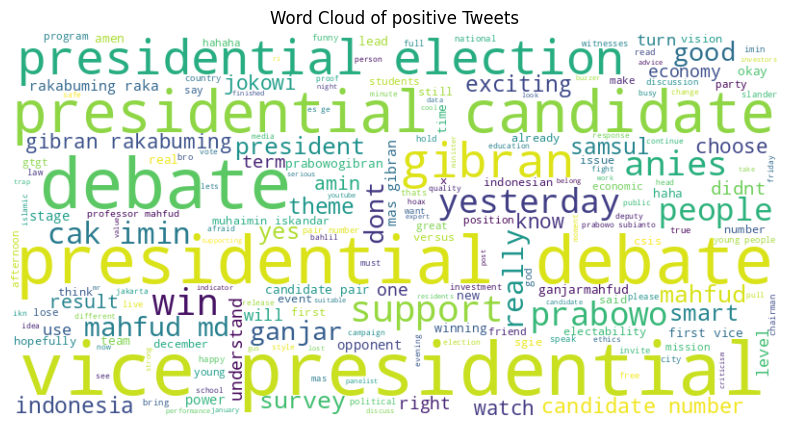

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load data
path_deployment = '/content/drive/MyDrive/data/Debat 2/predicted_svm.csv'
df = pd.read_csv(path_deployment)

# Filter for positive tweets
positive_tweets = df[df['prediksi_svm'] == 'positif']

# Combine all positive tweets into one string
positive_text = ' '.join(positive_tweets['cleansing_english'].fillna(''))

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of positive Tweets')
plt.show()

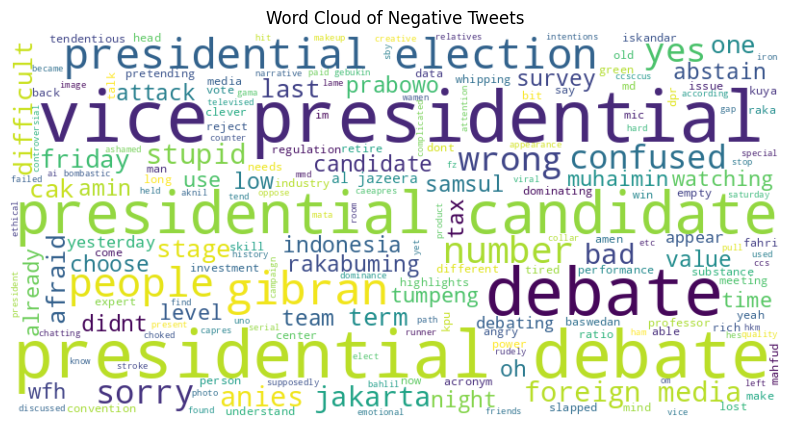

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load data
path_deployment = '/content/drive/MyDrive/data/Debat 2/predicted_svm.csv'
df = pd.read_csv(path_deployment)

# Filter for negative tweets
negative_tweets = df[df['prediksi_svm'] == 'negatif']

# Combine all negative tweets into one string
negative_text = ' '.join(negative_tweets['cleansing_english'].fillna(''))

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Negative Tweets')
plt.show()

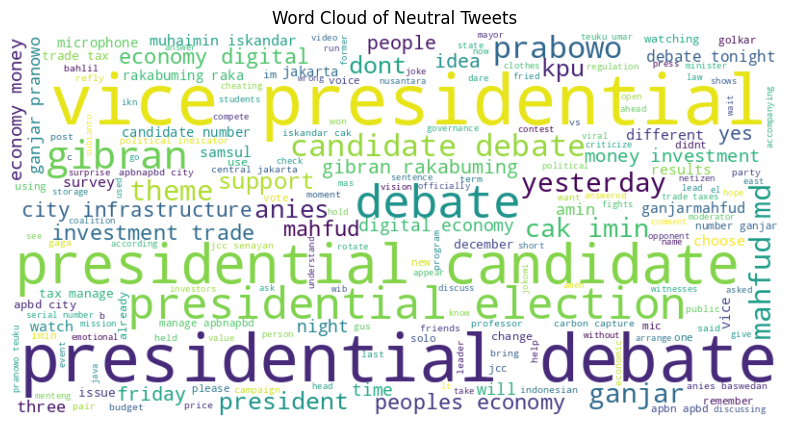

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load data
path_deployment = '/content/drive/MyDrive/data/Debat 2/predicted_svm.csv'
df = pd.read_csv(path_deployment)

# Filter for neutral tweets
neutral_tweets = df[df['prediksi_svm'] == 'netral']

# Combine all neutral tweets into one string
neutral_text = ' '.join(neutral_tweets['cleansing_english'].fillna(''))

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Neutral Tweets')
plt.show()


##Visualisasi Hasil Prediksi SVM

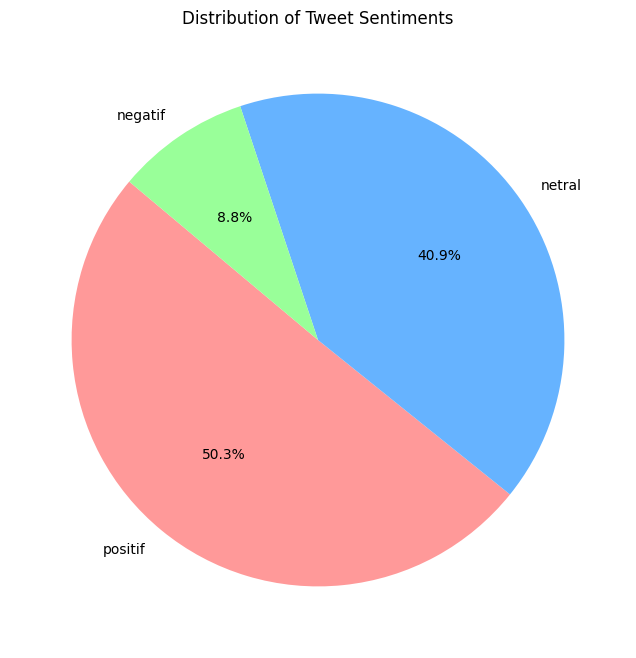

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
path_modelling = 'predicted_svm.csv'
df = pd.read_csv(path_modelling)

# Calculate the percentage of each sentiment
sentiment_counts = df['prediksi_svm'].value_counts()
sentiment_percentages = sentiment_counts / sentiment_counts.sum() * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Tweet Sentiments')
plt.show()


##Dashboard Analisis Sentimen (Unsupervised)

**Merge Dataset**

In [ ]:
# /content/drive/MyDrive/data/Debat 2/df_debat2_clean.csv
# /content/drive/MyDrive/data/Debat 2/df_debat2_stemming.csv
# /content/drive/MyDrive/data/Debat 2/df_debat2_translate.csv
# /content/drive/MyDrive/data/Debat 2/df_debat2_labelling.csv


# Memuat data dari file CSV pertama
file_awal = '/content/drive/MyDrive/data/Debat 2/df_debat2_clean.csv'
data_awal = pd.read_csv(file_awal)

# Memuat data dari file CSV kedua
file_preprocessing = '/content/drive/MyDrive/data/Debat 2/df_debat2_stemming.csv'
data_preprocessing = pd.read_csv(file_preprocessing)

# Memuat data normalisasi
file_normalisasi = '/content/drive/MyDrive/data/Debat 2/df_debat2_translate.csv'
data_normalisasi = pd.read_csv(file_normalisasi)

# Memuat data sentiment
file_sentiment = '/content/drive/MyDrive/data/Debat 2/df_debat2_labelling.csv'
data_sentiment = pd.read_csv(file_sentiment)

# Menggabungkan kolom dari data_preprocessing ke data_awal berdasarkan 'full_text'
data_gabungan = data_awal.merge(data_preprocessing[['full_text', 'cleansing', 'Tokenization and Case Folding', 'Filtering/stopwords removal', 'stemming_data']], on='full_text', how='left')

# Menggabungkan kolom dari data_normalisasi
data_gabungan = data_gabungan.merge(data_normalisasi[['stemming_data', 'kata_tidak_baku', 'kata_baku', 'normalisasi', 'tweet_english']], on='stemming_data', how='left')

# Menggabungkan kolom dari data_sentiment
data_gabungan = data_gabungan.merge(data_sentiment[['normalisasi', 'tweet_english', 'cleansing_english', 'tokenize_tweet', 'subjektivitas', 'polaritas', 'sentimen']], on='normalisasi', how='left')

# Mengatur urutan kolom
kolom_awal = data_awal.columns.tolist()  # Dapatkan semua kolom dari data_awal
index_full_text = kolom_awal.index('full_text')  # Temukan indeks untuk 'full_text'

# Sisipkan kolom preprocessing dan kolom baru tepat setelah 'full_text'
kolom_baru = kolom_awal[:index_full_text + 1] + ['cleansing', 'Tokenization and Case Folding', 'Filtering/stopwords removal', 'stemming_data', 'kata_tidak_baku', 'kata_baku', 'normalisasi', 'tweet_english', 'cleansing_english', 'tokenize_tweet', 'subjektivitas', 'polaritas', 'sentimen'] + kolom_awal[index_full_text + 1:]
data_gabungan = data_gabungan.reindex(columns=kolom_baru)

# Menyimpan data gabungan ke file baru
data_gabungan.to_csv('/content/drive/MyDrive/data/Debat 2/df_debat2_dashboard.csv', index=False)

**drop data duplicates for deployment**

In [ ]:
# Melihat jumlah duplikasi data
path_to_csv = '/content/drive/MyDrive/data/Debat 2/df_debat2_dashboard.csv'
data = pd.read_csv(path_to_csv)
data.head(3)

,conversation_id_str,created_at,date_day,date_month,date_year,date,favorite_count,full_text,cleansing,Tokenization and Case Folding,...,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1740992361495511132,2023-12-30 08:10:46+00:00,30,12,2023,2023-12-30,2,@Niel_Irvingia01 Saya sdh pasti pilih siapa. D...,Saya sdh pasti pilih siapa Dan tetap mutualan ...,"['saya', 'sdh', 'pasti', 'pilih', 'siapa', 'da...",...,Unknown,Niel_Irvingia01,Indonesia,Indonesia,0,1,1,https://x.com/Fr4nst/status/1741008916979524053,720655727816105984,Fr4nst
1,1740992361495511132,2023-12-30 08:10:46+00:00,30,12,2023,2023-12-30,2,@Niel_Irvingia01 Saya sdh pasti pilih siapa. D...,Saya sdh pasti pilih siapa Dan tetap mutualan ...,"['saya', 'sdh', 'pasti', 'pilih', 'siapa', 'da...",...,Unknown,Niel_Irvingia01,Indonesia,Indonesia,0,1,1,https://x.com/Fr4nst/status/1741008916979524053,720655727816105984,Fr4nst
2,1740992361495511132,2023-12-30 08:10:46+00:00,30,12,2023,2023-12-30,2,@Niel_Irvingia01 Saya sdh pasti pilih siapa. D...,Saya sdh pasti pilih siapa Dan tetap mutualan ...,"['saya', 'sdh', 'pasti', 'pilih', 'siapa', 'da...",...,Unknown,Niel_Irvingia01,Indonesia,Indonesia,0,1,1,https://x.com/Fr4nst/status/1741008916979524053,720655727816105984,Fr4nst


In [ ]:
# Melihat jumlah duplikasi data
print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  10436


In [ ]:
data_cleaning = data.drop_duplicates()

# Mengecek kembali jumlah data yang telah di cleaning
print("Jumlah duplikasi: ", data_cleaning.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
data_cleaning.shape

(4651, 32)

In [ ]:
# Menyimpan data ke dalam df_debat2_clean
path_cleaning = "/content/drive/MyDrive/data/Debat 2/df_debat2_dashboard.csv"
data_cleaning.to_csv(path_cleaning, index=False)

print(f"File CSV telah disimpan di: {path_cleaning}")

File CSV telah disimpan di: /content/drive/MyDrive/data/Debat 2/df_debat2_dashboard.csv


In [ ]:
import pandas as pd

# Path file CSV
path_cleaning = "/content/drive/MyDrive/data/Debat 2/df_debat2_dashboard.csv"

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv(path_cleaning)

# Menghapus baris dengan nilai duplikat pada kolom 'full_text', tetapi tetap mempertahankan satu baris
df_cleaned = df.drop_duplicates(subset=['full_text'], keep='first')

# Menyimpan DataFrame yang sudah dibersihkan ke file CSV baru atau file yang sama
df_cleaned.to_csv(path_cleaning, index=False)

print("Data berhasil dibersihkan dari duplikat!")


Data berhasil dibersihkan dari duplikat!


In [ ]:
df_cleaned.shape

(3103, 32)

##Dashboard SVM Predicted

In [ ]:
import pandas as pd

# Membaca file CSV
df_debat = pd.read_csv('df_debat2_dashboard.csv')
df_predicted = pd.read_csv('predicted_svm.csv')

# Menggabungkan kedua data berdasarkan kolom 'cleansing_english'
df_merged = pd.merge(df_debat, df_predicted, on='cleansing_english', how='inner')

# Menyimpan hasil penggabungan ke file CSV baru
df_merged.to_csv('df_debat2_deployment.csv', index=False)

# Menampilkan beberapa baris hasil penggabungan
print(df_merged.head())


   conversation_id_str                 created_at  date_day  date_month  \
0  1740992361495511132  2023-12-30 08:10:46+00:00        30          12   
1  1740905152281030720  2023-12-30 06:58:58+00:00        30          12   
2  1740960455420756389  2023-12-30 04:58:12+00:00        30          12   
3  1740909359075578141  2023-12-30 01:35:10+00:00        30          12   
4  1740779999177974271  2023-12-29 17:01:08+00:00        29          12   

   date_year        date  favorite_count  \
0       2023  2023-12-30               2   
1       2023  2023-12-30               6   
2       2023  2023-12-30               0   
3       2023  2023-12-30               9   
4       2023  2023-12-29              24   

                                           full_text  \
0  @Niel_Irvingia01 Saya sdh pasti pilih siapa. D...   
1  @LeylaHana @okkymadasari Mba km mau tau ga aku...   
2           seru bgt dengerin temen2 ak debat capres   
3  Lalu lihat tema Debat 3 Capres: Pertahanan Kea...   
4  B

# Konversi csv to gexf SNA

In [ ]:
# Ensure these paths and variables are defined and accurate
folder_path = "/content/drive/MyDrive/data/Debat 2/Dataset/CLEAN/CLEAN DATA/"  # Updated folder path to match your latest structure

# Dictionary for keywords and their configurations
keywords_config = {
    "Debat": {"filename": "df_debat2_clean.csv"},
}

def process_tweets(filename):
    full_path = f"{folder_path}{filename}"
    df = pd.read_csv(full_path)
    G = nx.DiGraph()

    # Add nodes and edges based on the tweets data
    for index, row in df.iterrows():
        user = row['username']
        G.add_node(user)  # Add user as a node

        # Add edges if there is a reply
        if not pd.isna(row.get('in_reply_to_screen_name')):
            target_user = row['in_reply_to_screen_name']
            G.add_node(target_user)
            G.add_edge(user, target_user)

    gexf_path = full_path.replace('.csv', '.gexf')
    nx.write_gexf(G, gexf_path)
    return gexf_path

# Loop through each keyword configuration and process the corresponding CSV
for keyword, config in keywords_config.items():
    filename = config["filename"]
    gexf_path = process_tweets(filename)
    print(f"Processed '{keyword}' tweets to GEXF: {gexf_path}")


Processed 'Debat' tweets to GEXF: /content/drive/MyDrive/data/Debat 2/Dataset/CLEAN/CLEAN DATA/df_debat2_clean.gexf
